Título do Projeto: Projeto 3: EAD com SQL

Tópicos

**1 - Apresentação**

Este projeto demonstra minhas habilidades na linguagem **SQL** para análise de dados de crédito. O objetivo principal foi explorar um conjunto de dados de clientes de cartão de crédito para identificar padrões e insights para o negócio.

**Análise Exploratória de Dados**

***Criação da Tabela:**

Criei uma tabela no Athena usando a linguagem SQL (DDL - Data Definition Language) para definir o esquema da tabela, especificando os tipos de dados de cada coluna.
O comando CREATE EXTERNAL TABLE foi usado para mapear os dados do bucket S3 para a tabela no Athena.
Consultas SQL:

Realizei diversas **consultas SQL** (DQL - Data Query Language) para explorar os dados, respondendo a perguntas como:
Qual a média de idade dos clientes por estado civil?
Qual a distribuição de escolaridade dos clientes com alto limite de crédito?
Quais os tipos de cartão mais utilizados por clientes com dependentes?
Conhecimentos em SQL Utilizados:

DDL (Data Definition Language): CREATE EXTERNAL TABLE para criar a tabela no Athena.
DQL (Data Query Language): **SELECT, FROM, WHERE, GROUP BY, ORDER BY, AVG, COUNT, etc.** para realizar consultas e agregações.

**Funções SQL: AVG, COUNT, SUM, MAX, MIN, etc.** para calcular estatísticas descritivas.

**Tipos de Dados: INT, STRING, FLOAT, etc.** para definir os tipos de dados das colunas.

**Cláusulas: WHERE** para filtrar dados, **GROUP BY** para agrupar dados, **ORDER BY** para ordenar resultados.

# **2 - Base de Dados e Ambientes**

# **3 - Análise Exploratória de Dados**

## **3.1 - Tabela**

Para fazer a tabela de onde os dados serão visualizados, os seguintes passos foram seguidos:
1. Criar uma bucket, neste caso, chamado llondjari-projeto-sql;
2. Carregar o arquivo dos dados, credito.csv, no bucket;
3. Criar a tabela no Athena usando o comando abaixo.

Criando a tabela:
```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://llondjari-projeto-sql/'
TBLPROPERTIES ('has_encrypted_data'='false');
```
Abaixo, um print com a confirmação do comando.

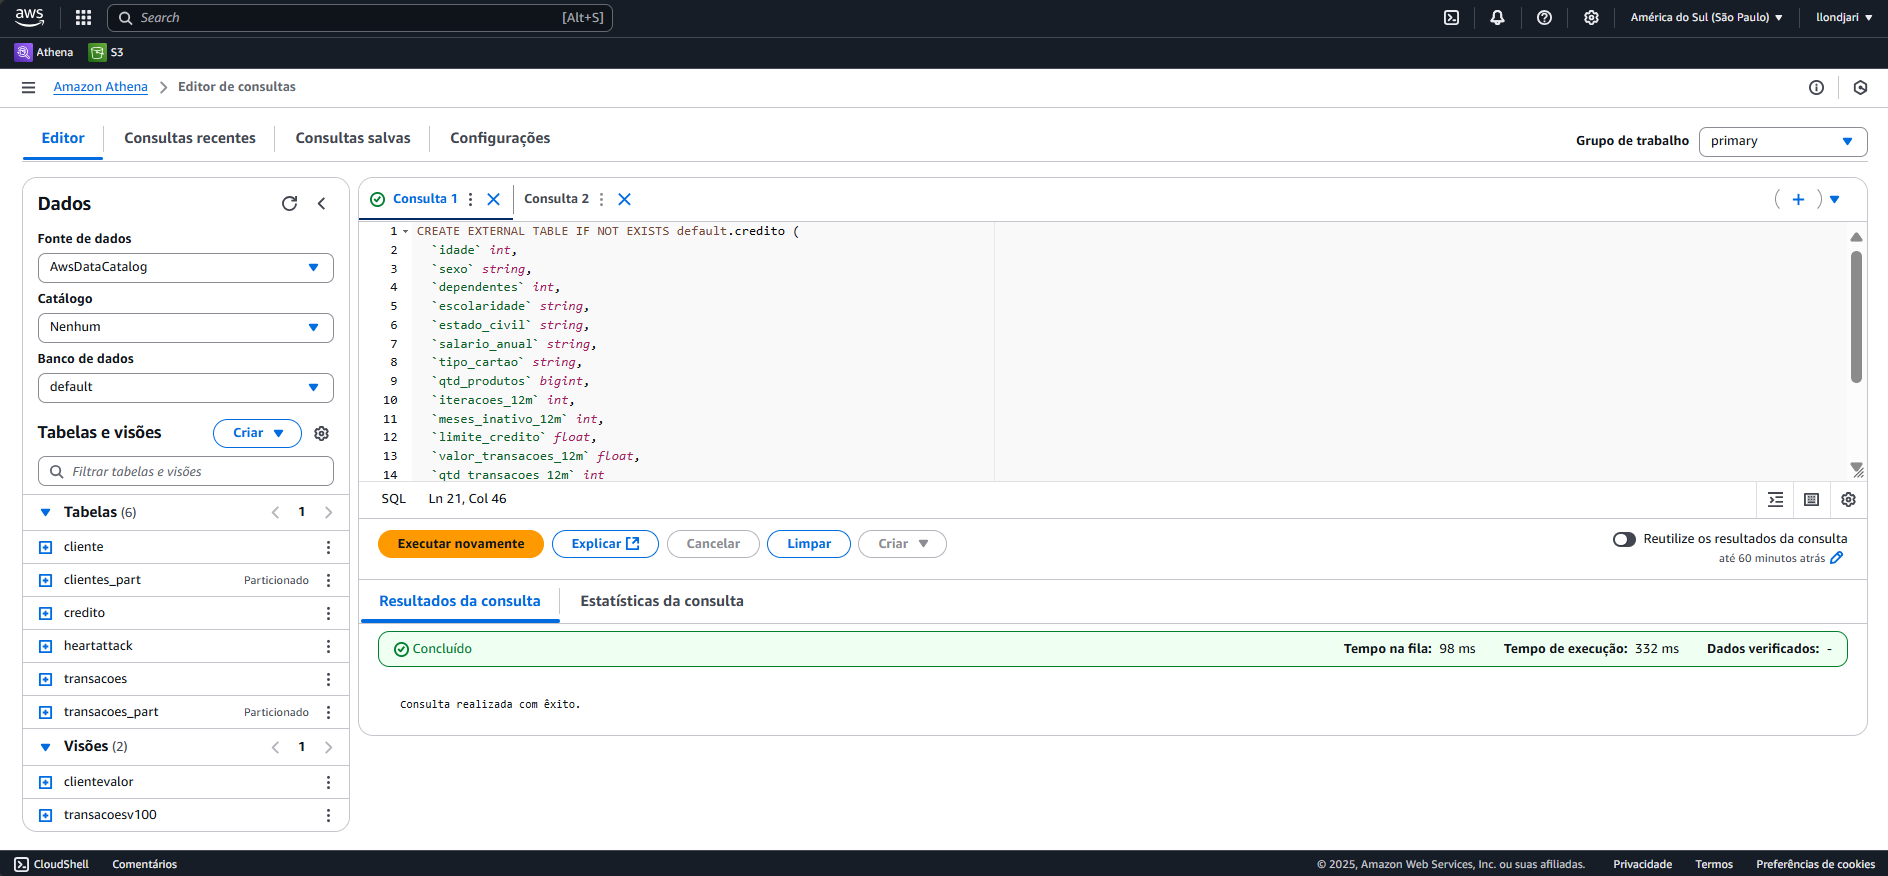

## **3.2 - Estrutura dos Dados**

**Compreendendo a estrutura dos dados:**
O primeiro passo para começar a análise exploratória dos dados, é verificar sua extrutura. Que pode ser feito com os seguintes comandos:

Descrevendo a tabela: verificando o schema:
```sql
DESCRIBE credito;
```
 * Exibe informações sobre as colunas da tabela, como nome, tipo de dado e comentário.

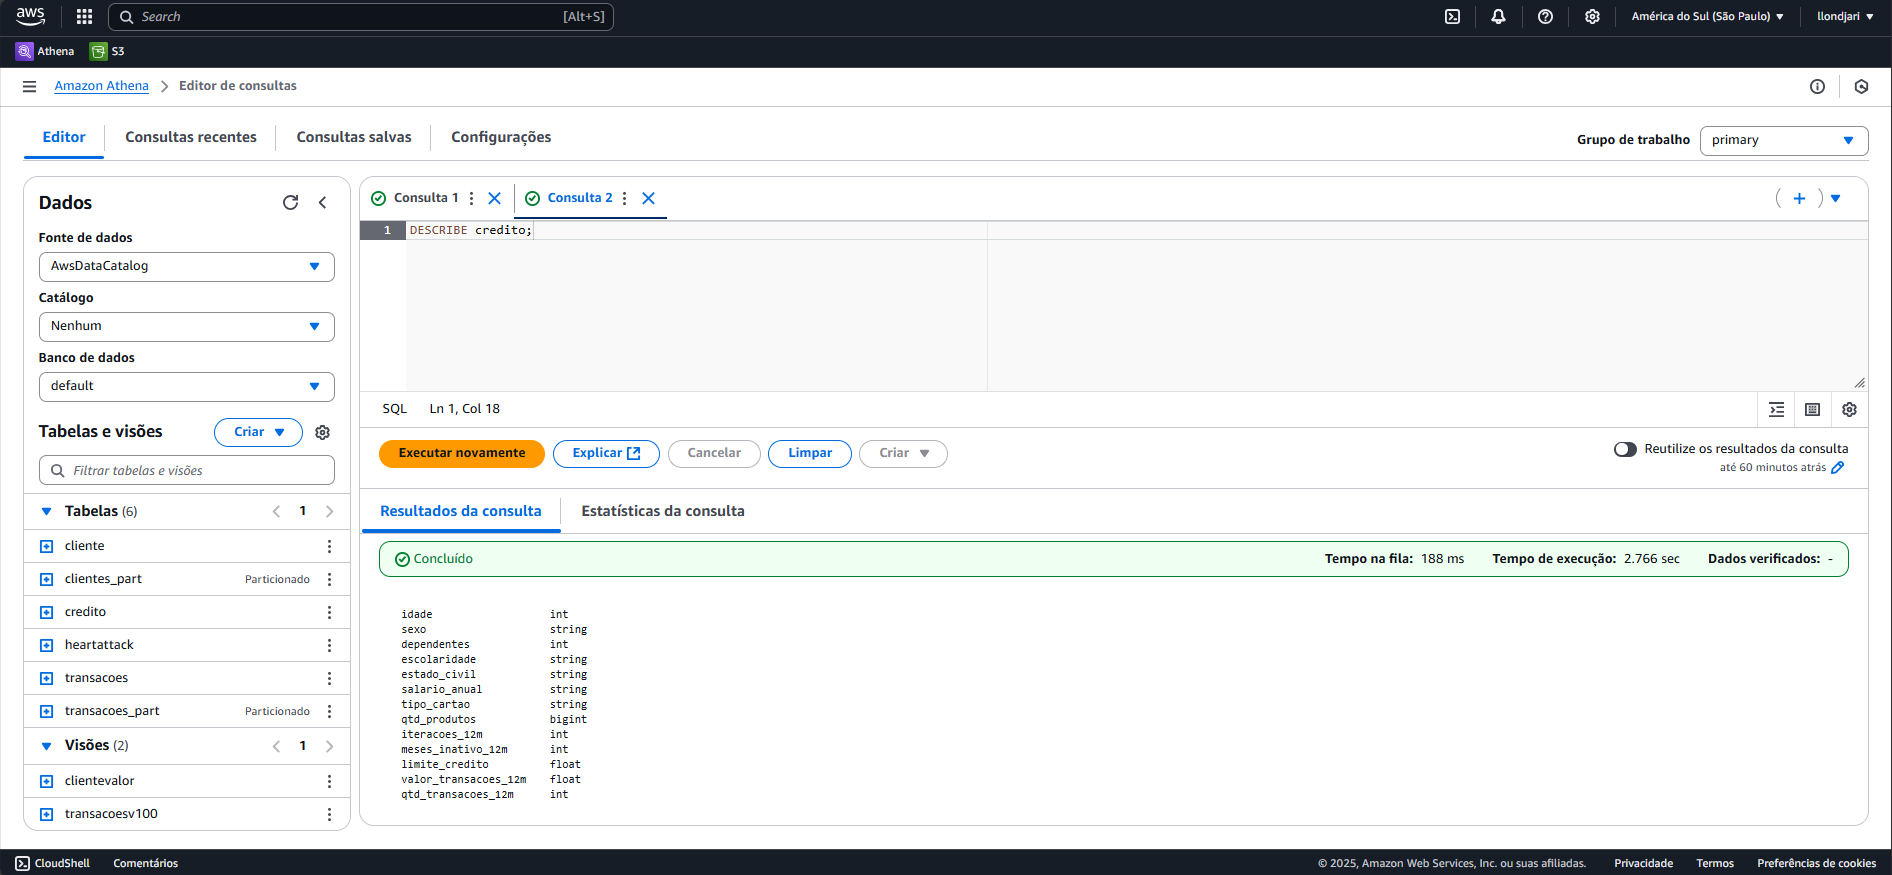

Verificando a quantidade de dados:
```sql
select count(*) from credito;
```
 * Informa o número de registros/linhas da tabela.

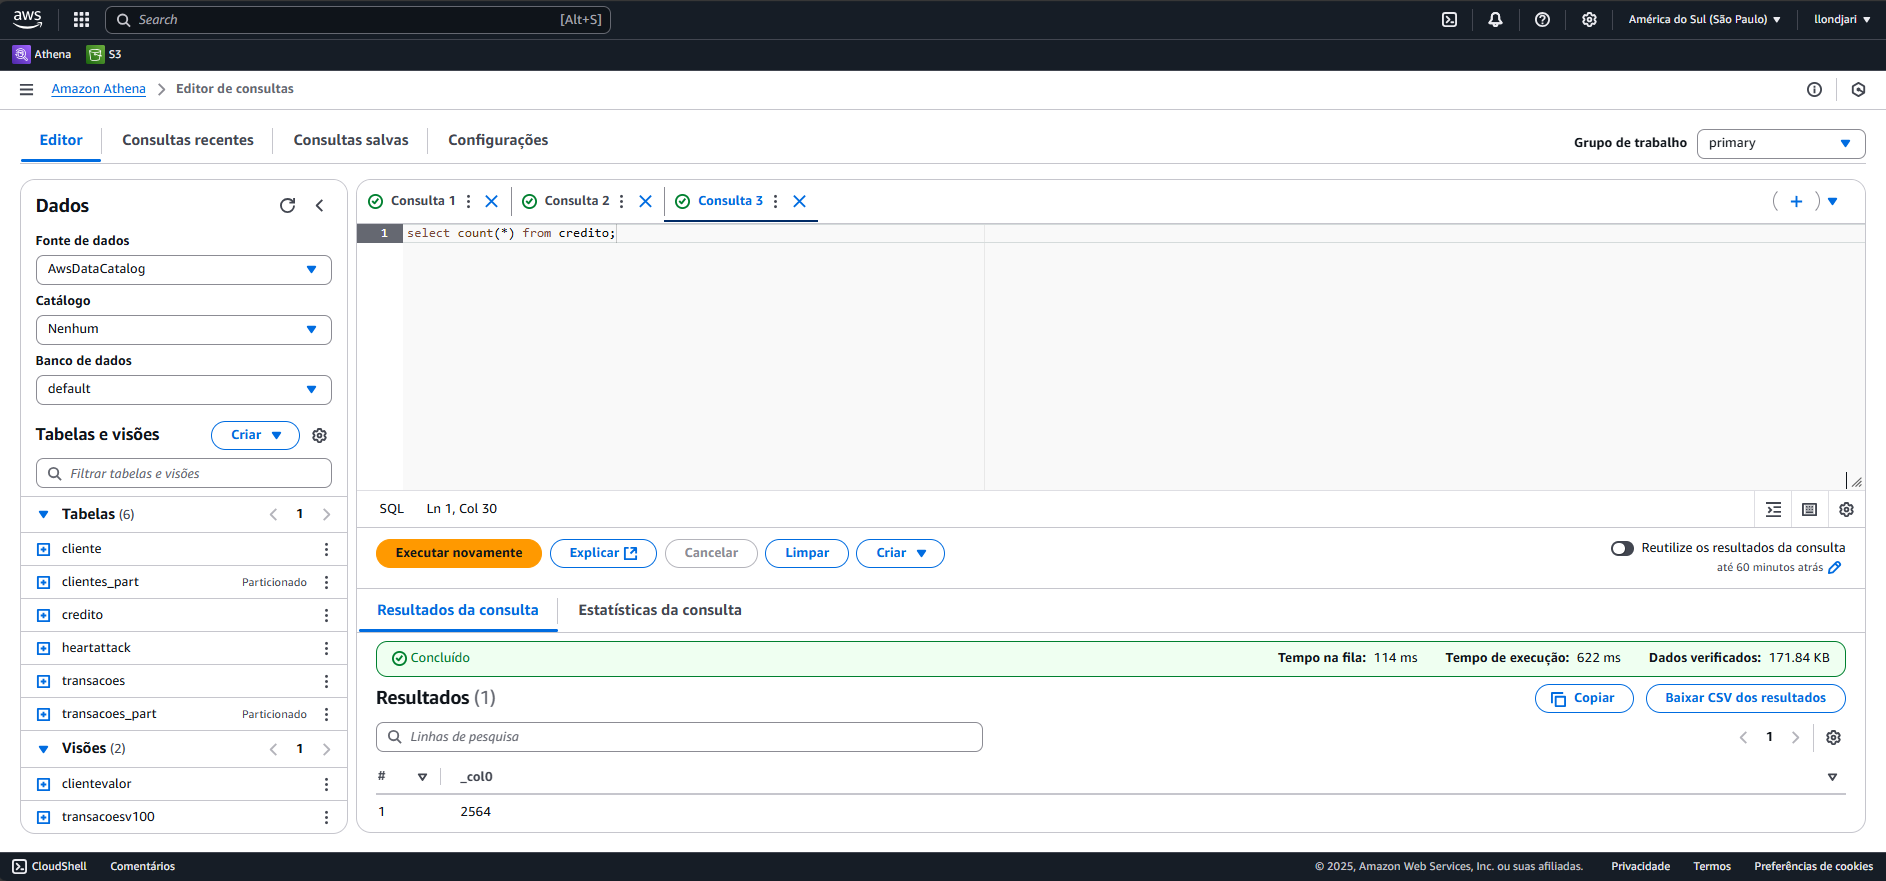

Visualizando alguns registros:
```sql
SELECT * FROM credito LIMIT 10;
```
 * Mostra as primeiras 10 linhas da tabela para ter uma ideia dos dados.

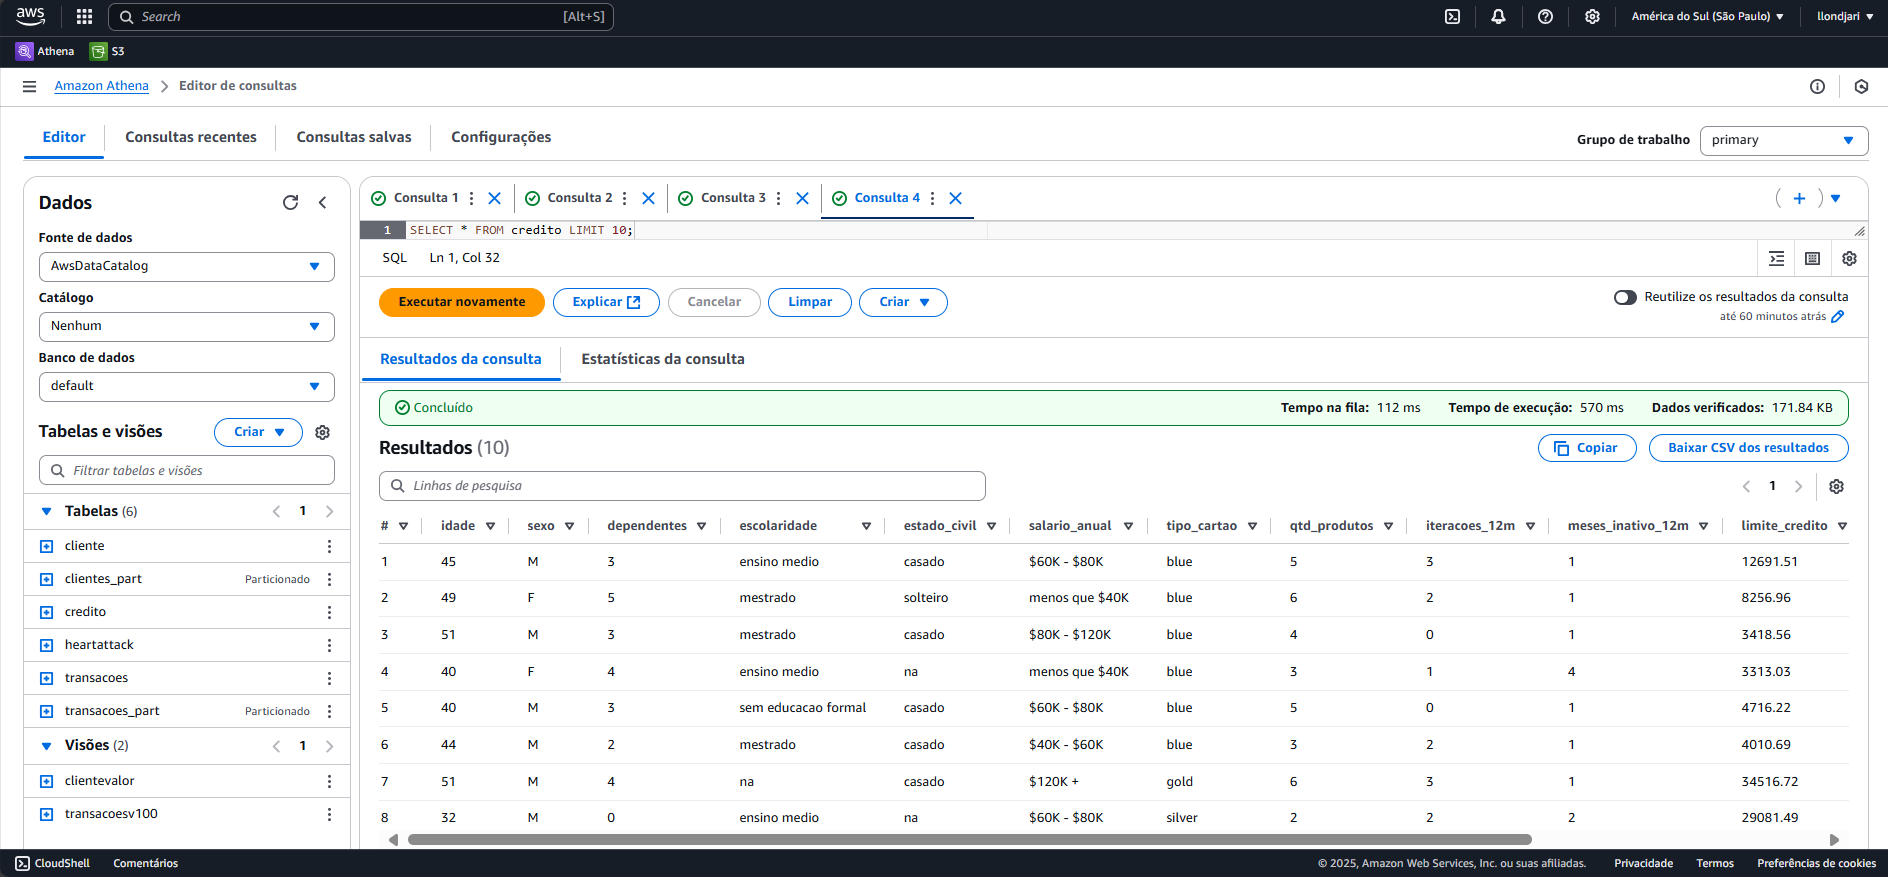

### **3.2.1 - Valores Nulos**

Verificando Valores Nulos:

```sql
SELECT
    SUM(CASE WHEN idade IS NULL THEN 1 ELSE 0 END) AS idade_nulos,
    SUM(CASE WHEN sexo IS NULL THEN 1 ELSE 0 END) AS sexo_nulos,
    SUM(CASE WHEN dependentes IS NULL THEN 1 ELSE 0 END) AS dependentes_nulos,
    SUM(CASE WHEN escolaridade IS NULL THEN 1 ELSE 0 END) AS escolaridade_nulos,
    SUM(CASE WHEN estado_civil IS NULL THEN 1 ELSE 0 END) AS estado_civil_nulos,
    SUM(CASE WHEN salario_anual IS NULL THEN 1 ELSE 0 END) AS salario_anual_nulos,
    SUM(CASE WHEN tipo_cartao IS NULL THEN 1 ELSE 0 END) AS tipo_cartao_nulos,
    SUM(CASE WHEN qtd_produtos IS NULL THEN 1 ELSE 0 END) AS qtd_produtos_nulos,
    SUM(CASE WHEN iteracoes_12m IS NULL THEN 1 ELSE 0 END) AS iteracoes_12m_nulos,
    SUM(CASE WHEN meses_inativo_12m IS NULL THEN 1 ELSE 0 END) AS meses_inativo_12m_nulos,
    SUM(CASE WHEN limite_credito IS NULL THEN 1 ELSE 0 END) AS limite_credito_nulos,
    SUM(CASE WHEN valor_transacoes_12m IS NULL THEN 1 ELSE 0 END) AS valor_transacoes_12m_nulos,
    SUM(CASE WHEN qtd_transacoes_12m IS NULL THEN 1 ELSE 0 END) AS qtd_transacoes_12m_nulos
FROM credito;
```
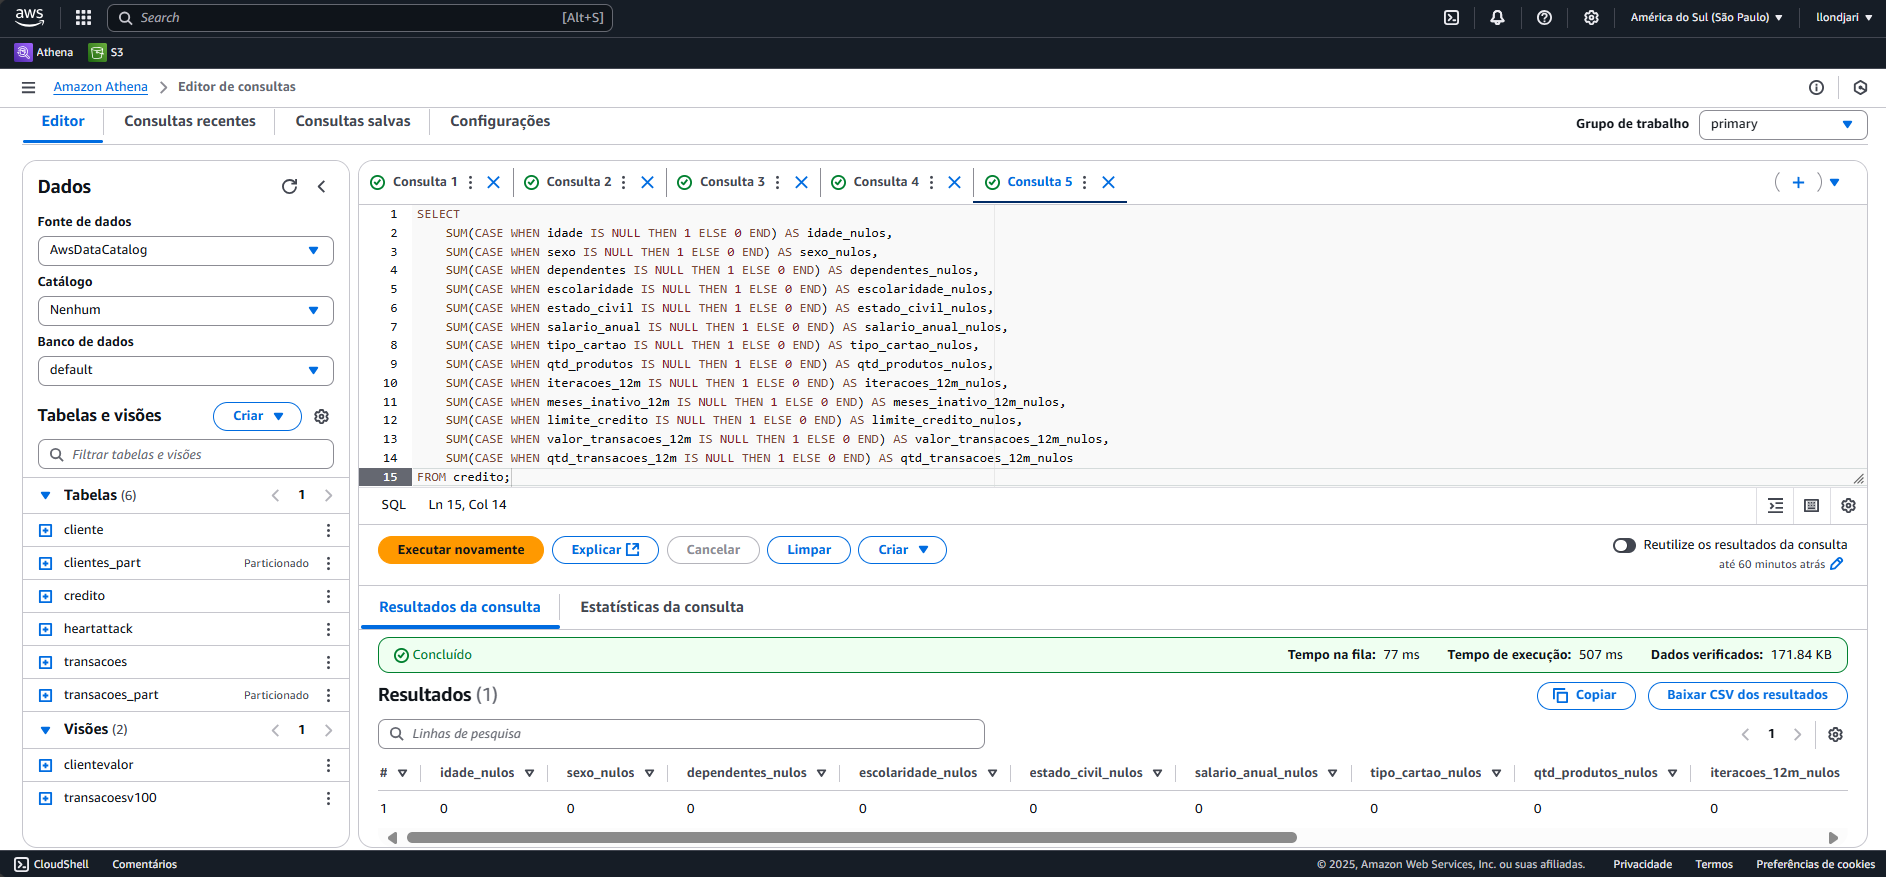

O Athena pode contar valores nulos 'na' como string. Neste caso, faremos uma busca contando as ocorrências de 'na' para sabermos quantos valores nulos estão na tabela, conforme a busca abaixo:

```sql
SELECT SUM(
    CASE WHEN CAST(idade AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN sexo LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN CAST(dependentes AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN escolaridade LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN estado_civil LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN salario_anual LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN tipo_cartao LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN CAST(qtd_produtos AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN CAST(iteracoes_12m AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN CAST(meses_inativo_12m AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN CAST(limite_credito AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN CAST(valor_transacoes_12m AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END +
    CASE WHEN CAST(qtd_transacoes_12m AS VARCHAR) LIKE '%na%' THEN 1 ELSE 0 END
) AS total_ocorrencias
FROM credito;
```

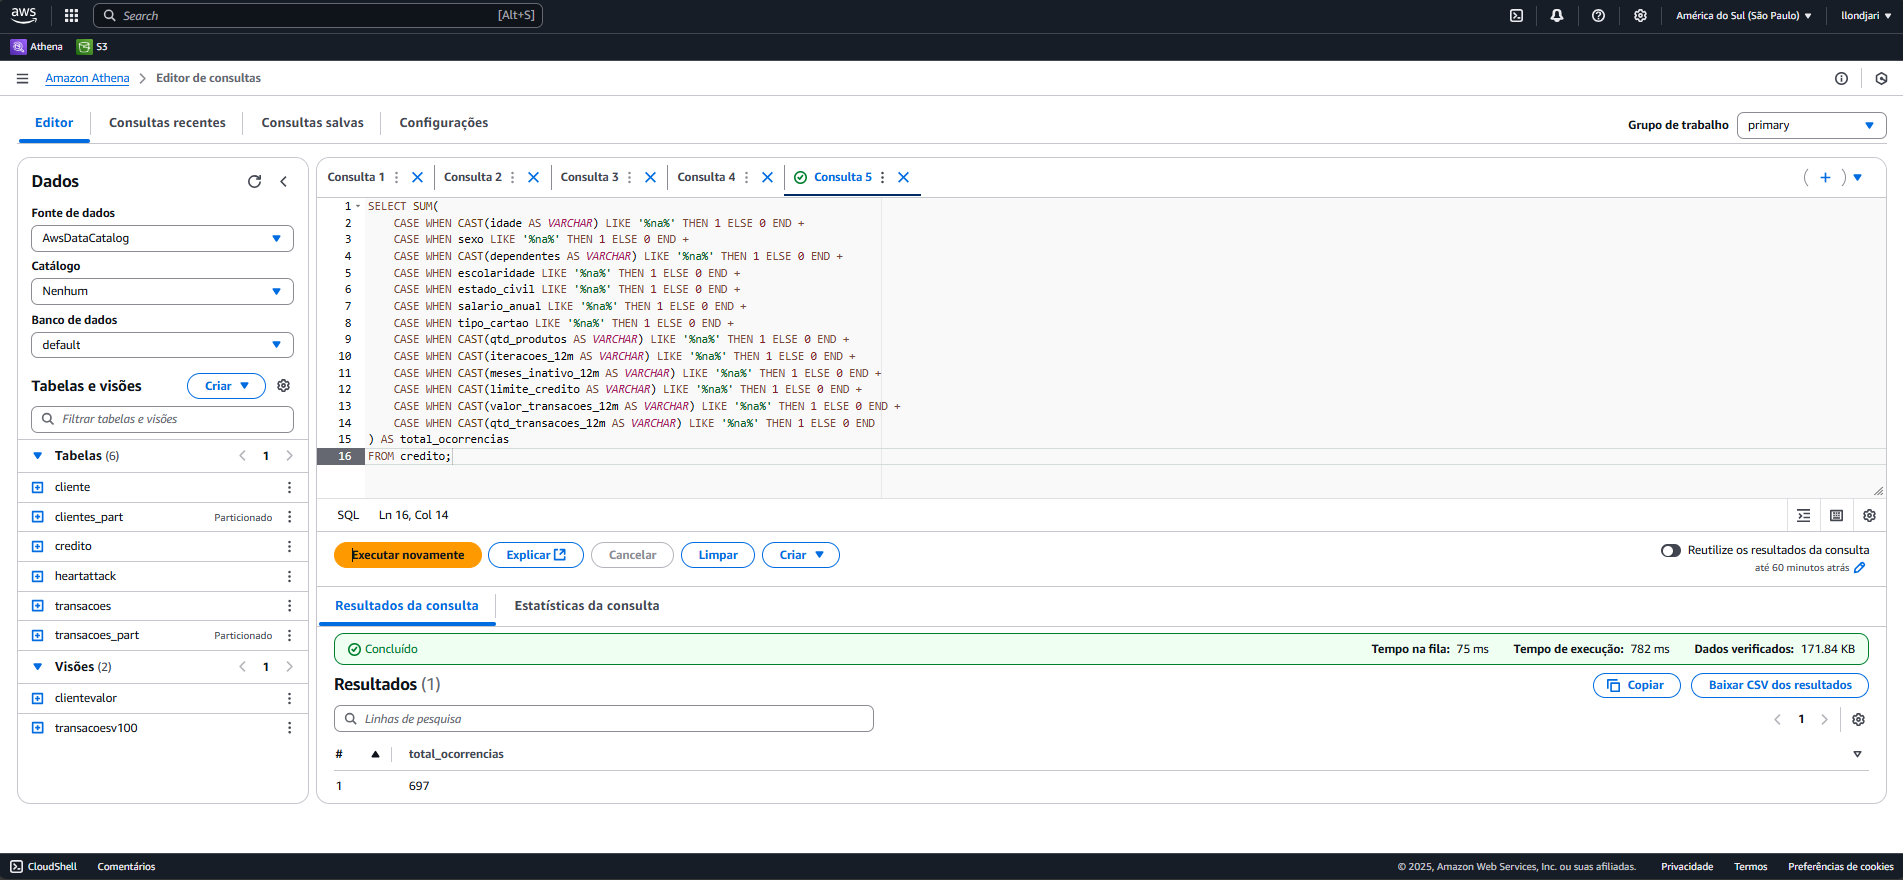

## **3.3 - Analisando variáveis individuais:**

### **3.3.1 - Variáveis Individuais**

**Analisando variáveis individuais:**

Aqui, olharemos para os valores individuais das colunas cuja os dados são string.


*   Sexo
*   escolaridade
*   estado_civil
*   salario_anual
*   tipo_cartao

Verificando valores distintos:

```sql
SELECT DISTINCT sexo FROM credito;
SELECT DISTINCT escolaridade FROM credito;
SELECT DISTINCT estado_civil FROM credito;
SELECT DISTINCT salario_anual FROM credito;
SELECT DISTINCT tipo_cartao FROM credito;
```
 * Conta o número de valores únicos em cada coluna, o que ajuda a entender a variedade de dados.

Valores individuais da coluna sexo:

```sql
SELECT DISTINCT sexo FROM credito;
```

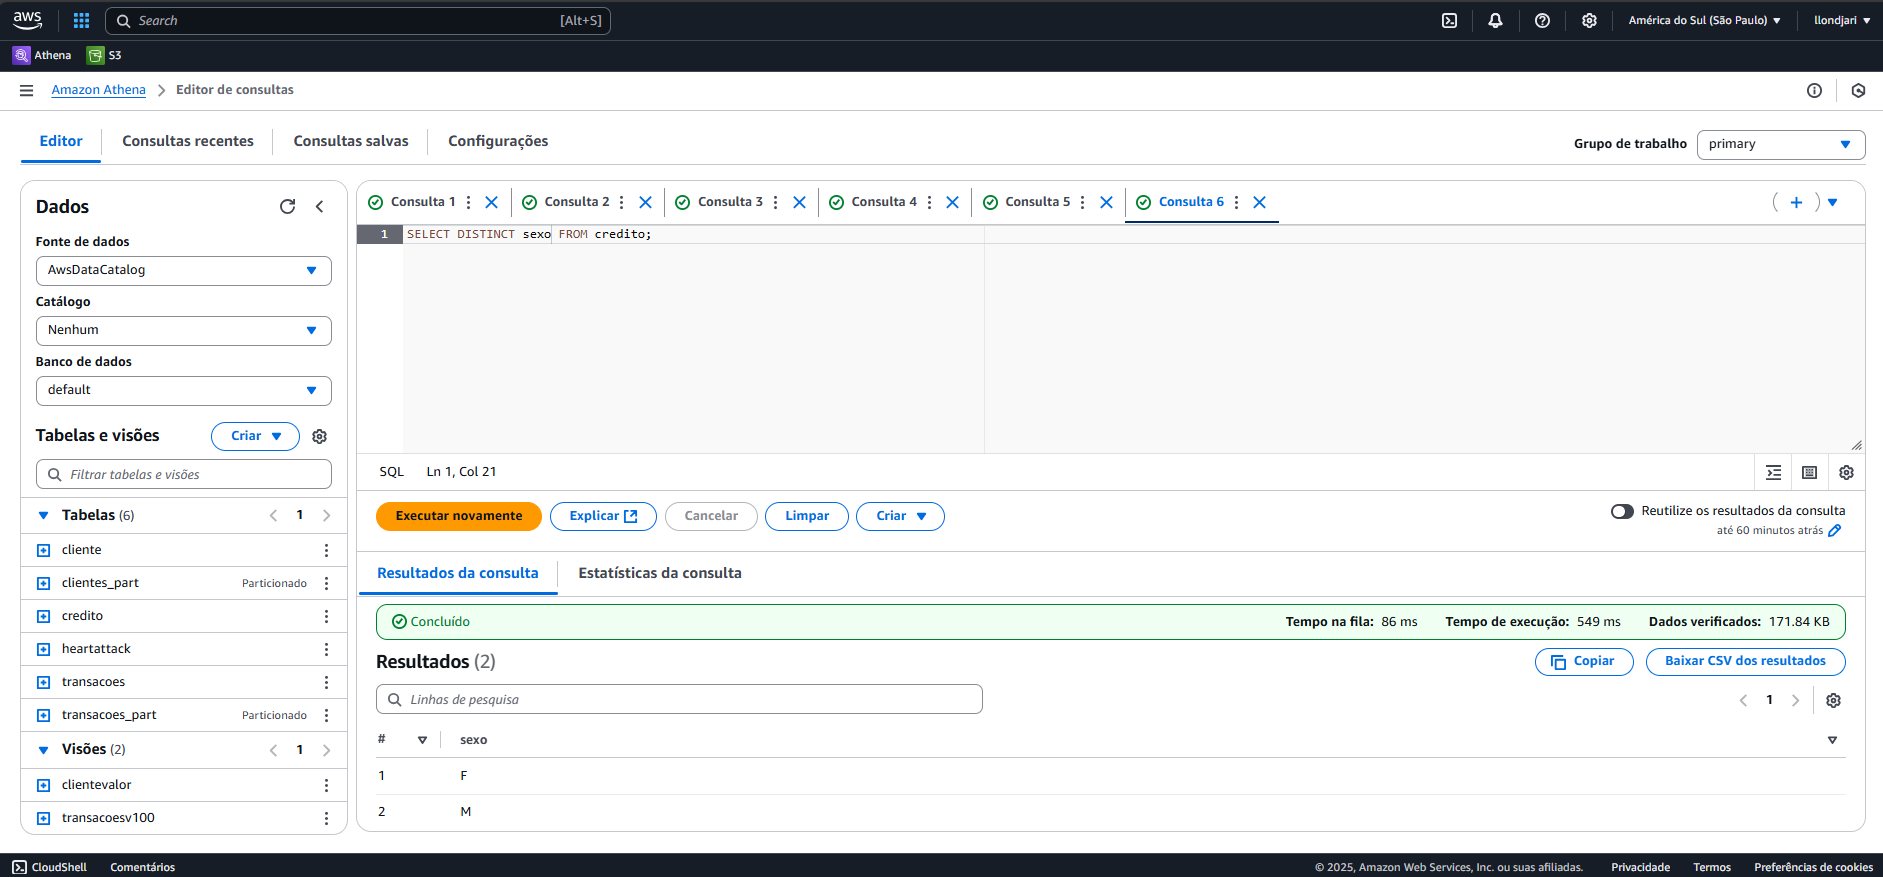

Valores individuais da coluna escolaridade:

```sql
SELECT DISTINCT escolaridade FROM credito;
```

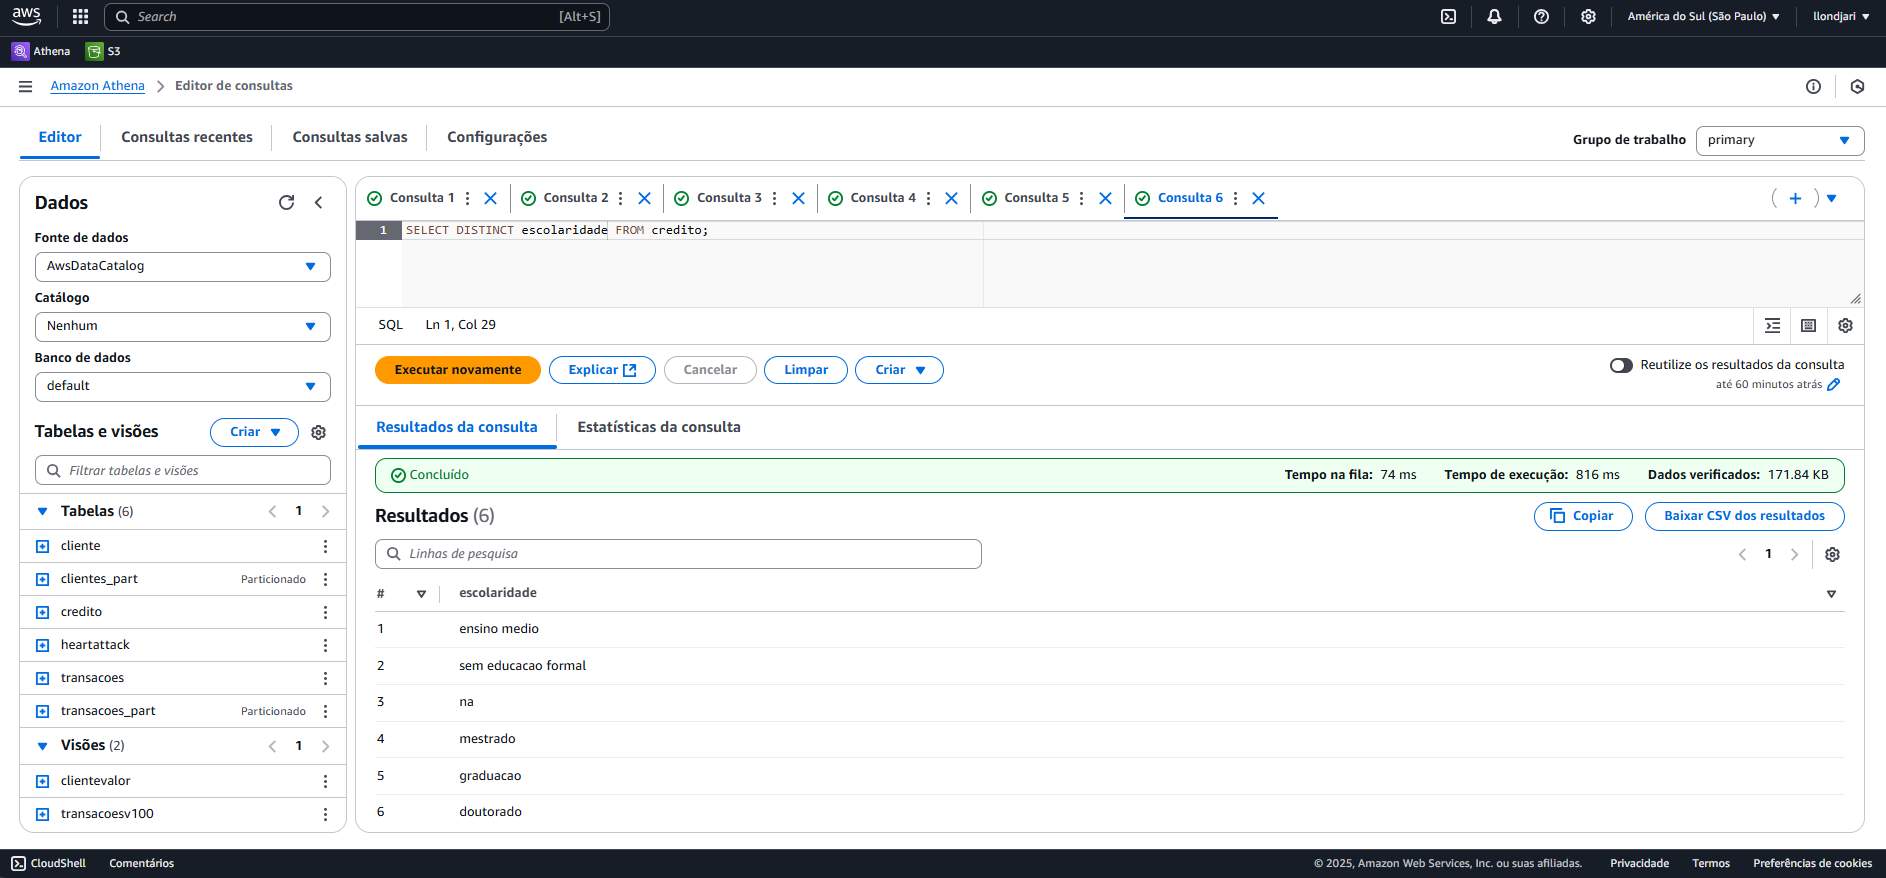

Valores individuais da coluna estado_civil:

```sql
SELECT DISTINCT estado_civil FROM credito;
```

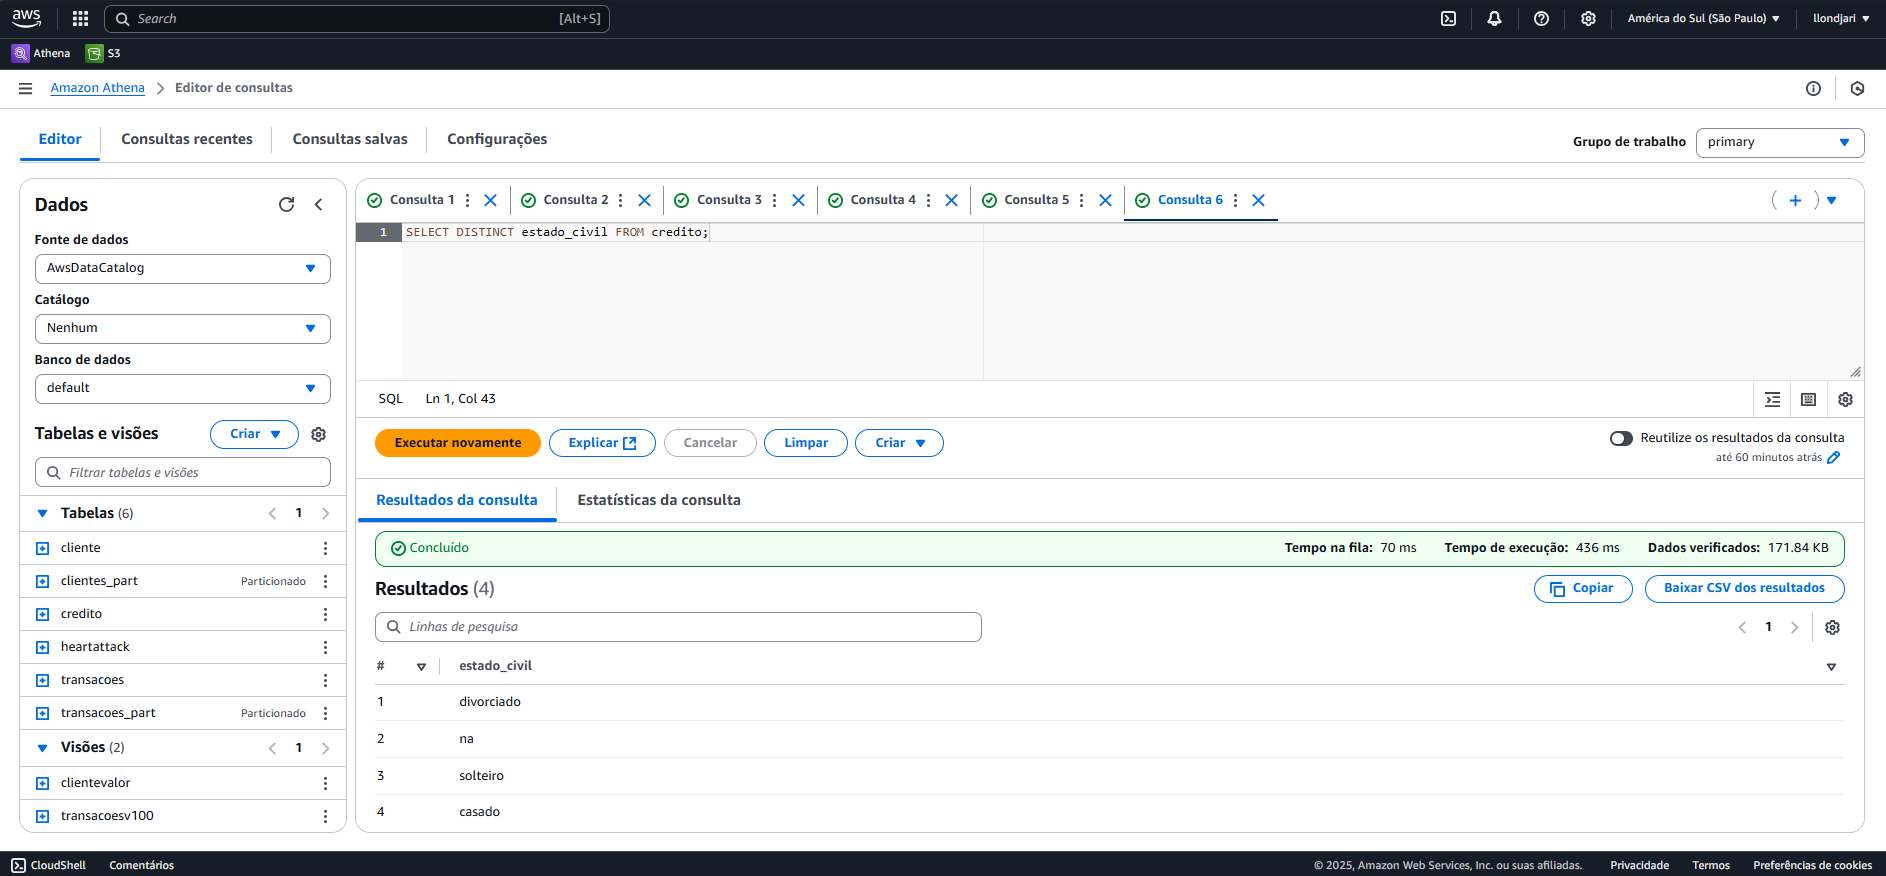

Valores individuais da coluna salario_anual:

```sql
SELECT DISTINCT salario_anual FROM credito;
```

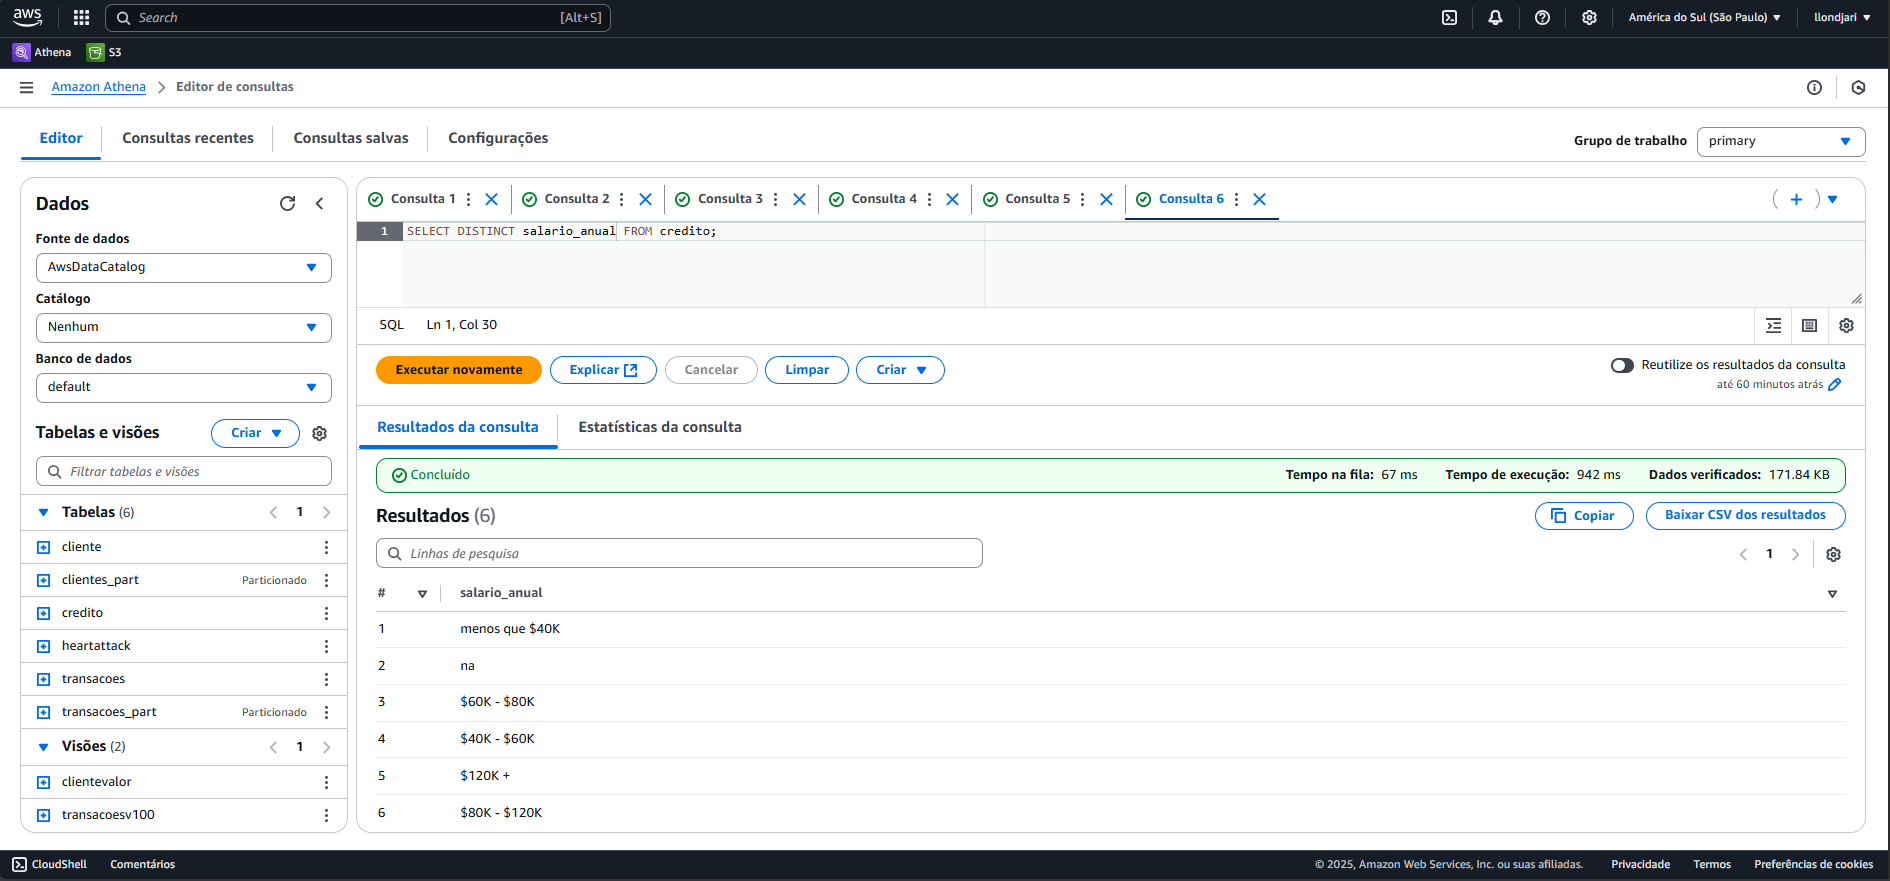


Valores individuais da coluna tipo_cartao:

```sql
SELECT DISTINCT tipo_cartao FROM credito;
```

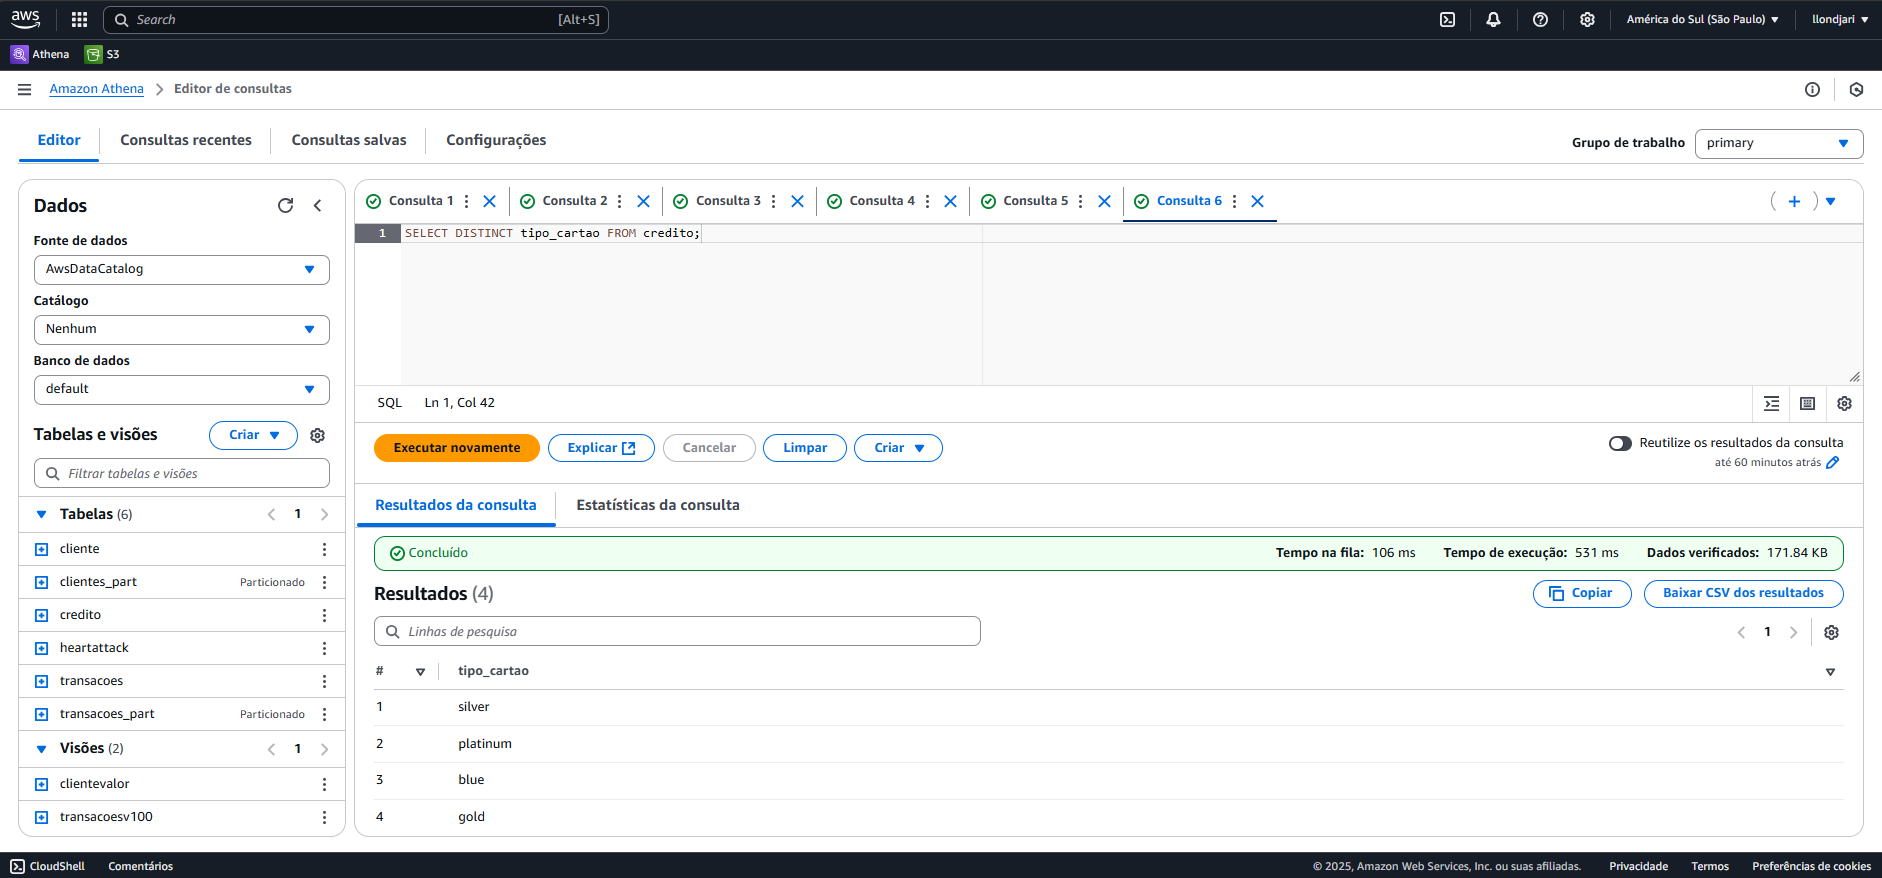

### **3.3.2 - Estatística descritiva**

Calculando estatísticas descritivas:
 * Calcula estatísticas como mínimo, máximo, média e desvio padrão para colunas numéricas, fornecendo insights sobre a distribuição dos dados.

Para a coluna idade:
```sql
SELECT MIN(idade), MAX(idade), AVG(idade), STDDEV(idade) FROM credito;
```
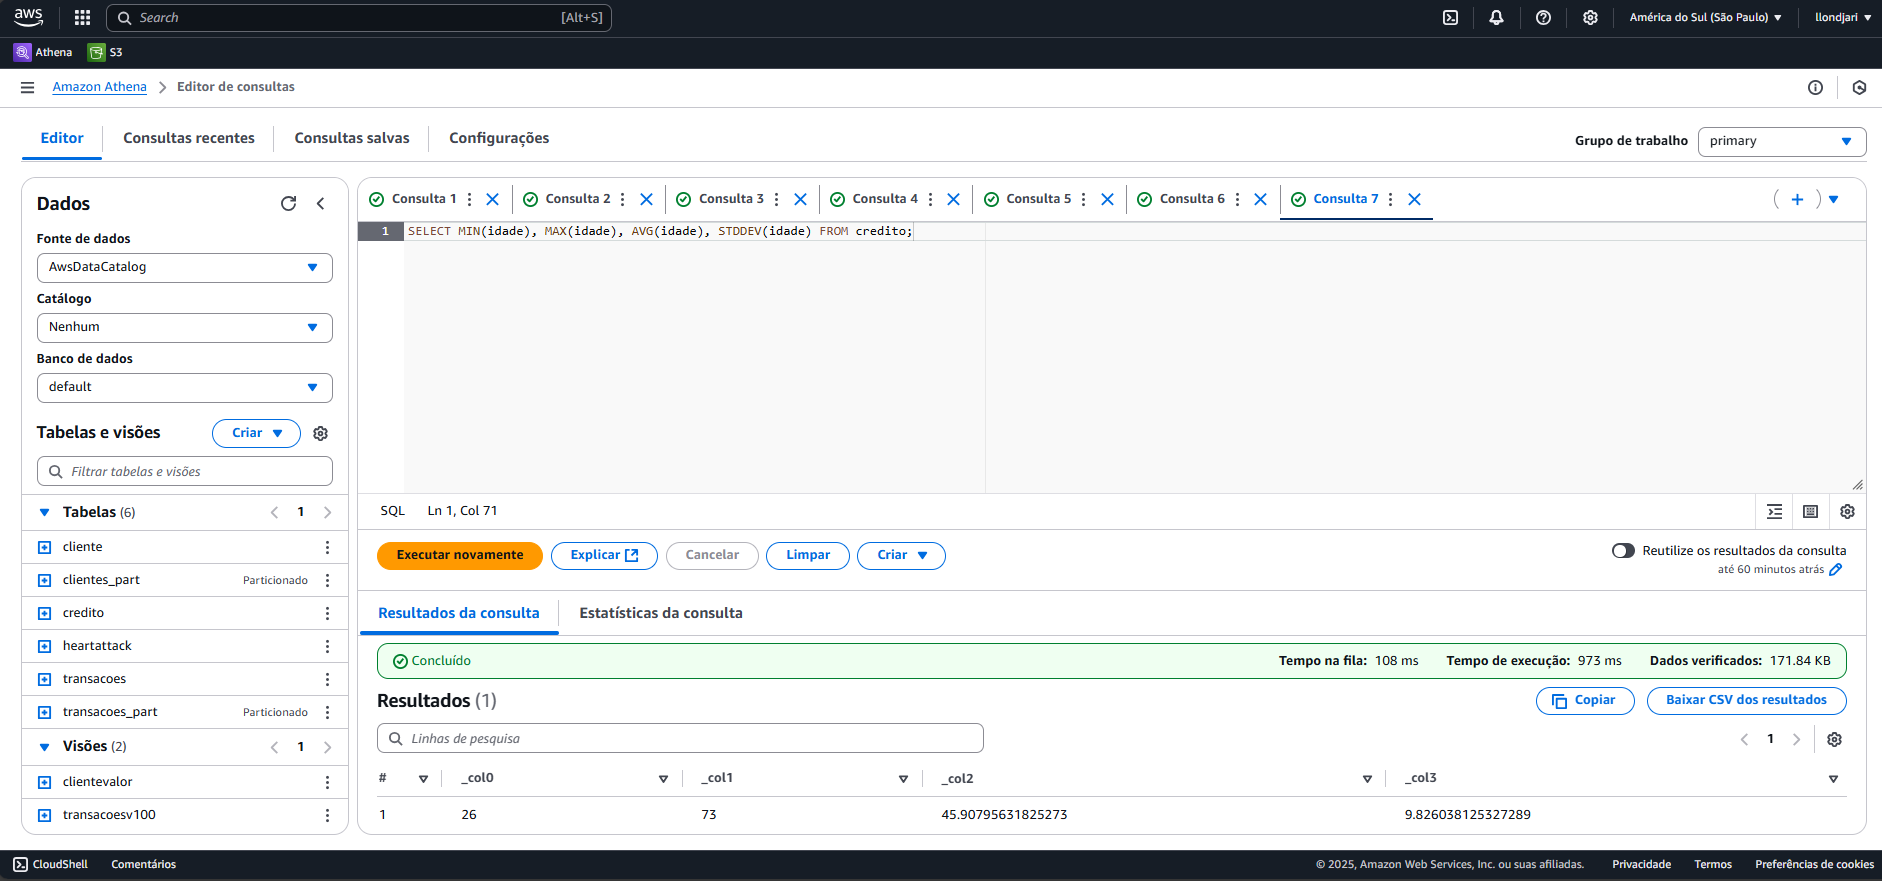

Para a coluna dependentes:
```sql
SELECT MIN(dependentes), MAX(dependentes), AVG(dependentes), STDDEV(dependentes) FROM credito;
```
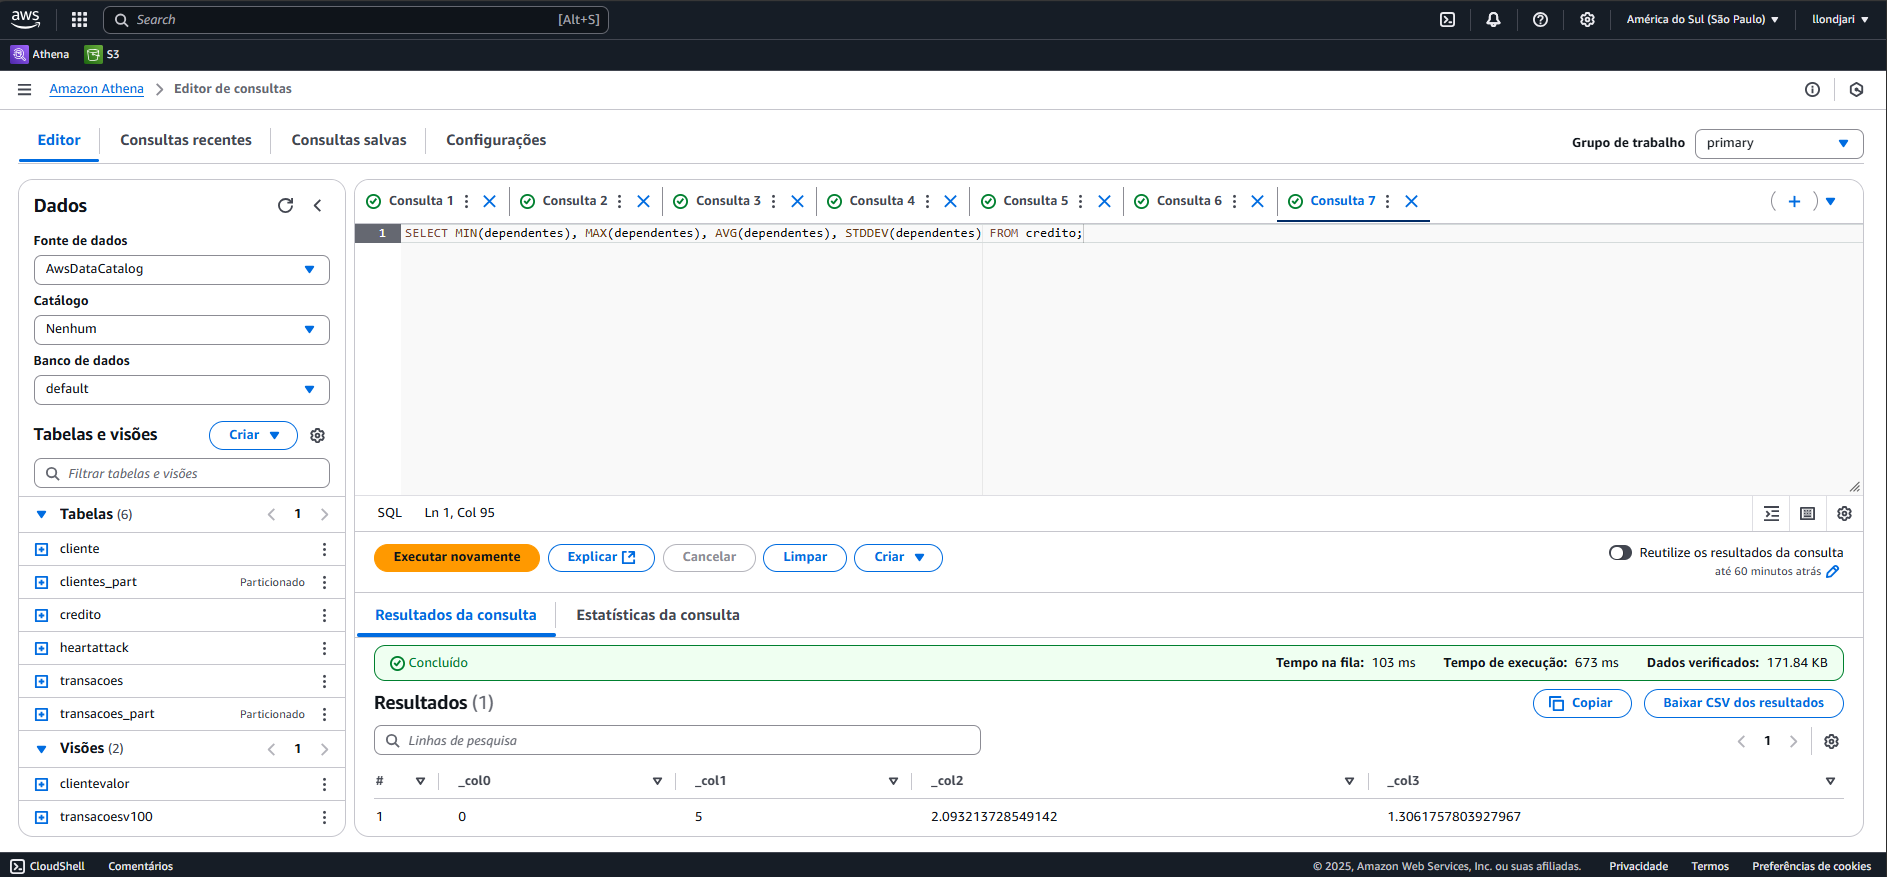

Para a coluna qtd_produtos:
```sql
SELECT MIN(qtd_produtos), MAX(qtd_produtos), AVG(qtd_produtos), STDDEV(qtd_produtos) FROM credito;
```
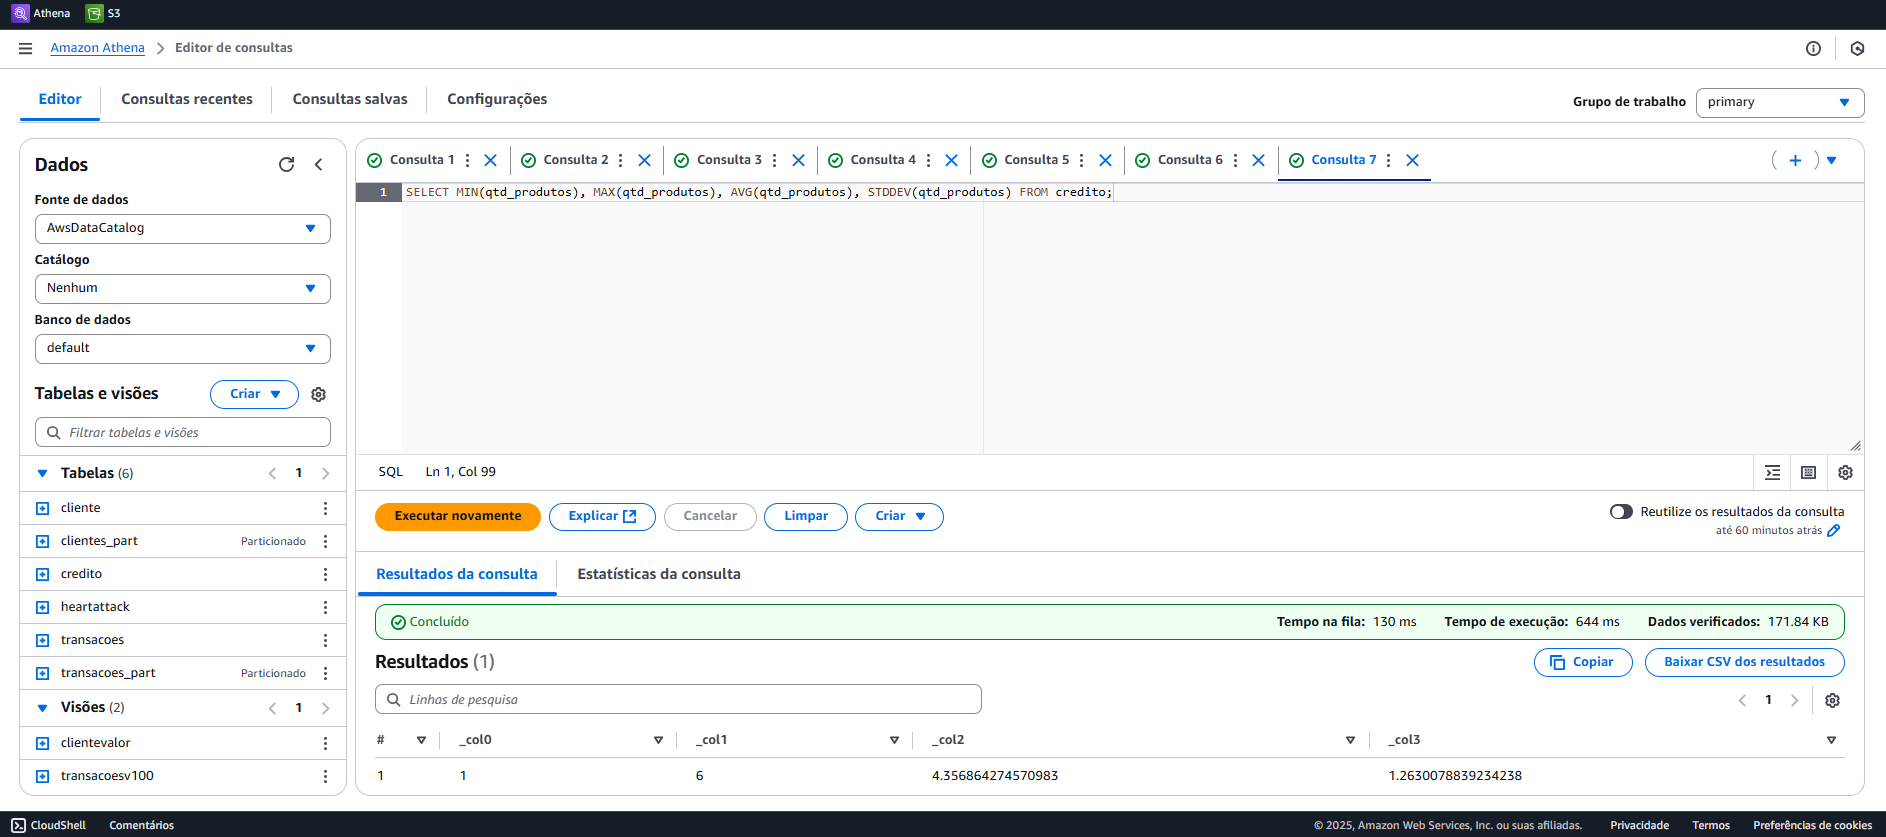

Para a coluna iteracoes_12m:
```sql
SELECT MIN(iteracoes_12m), MAX(iteracoes_12m), AVG(iteracoes_12m), STDDEV(iteracoes_12m) FROM credito;
```
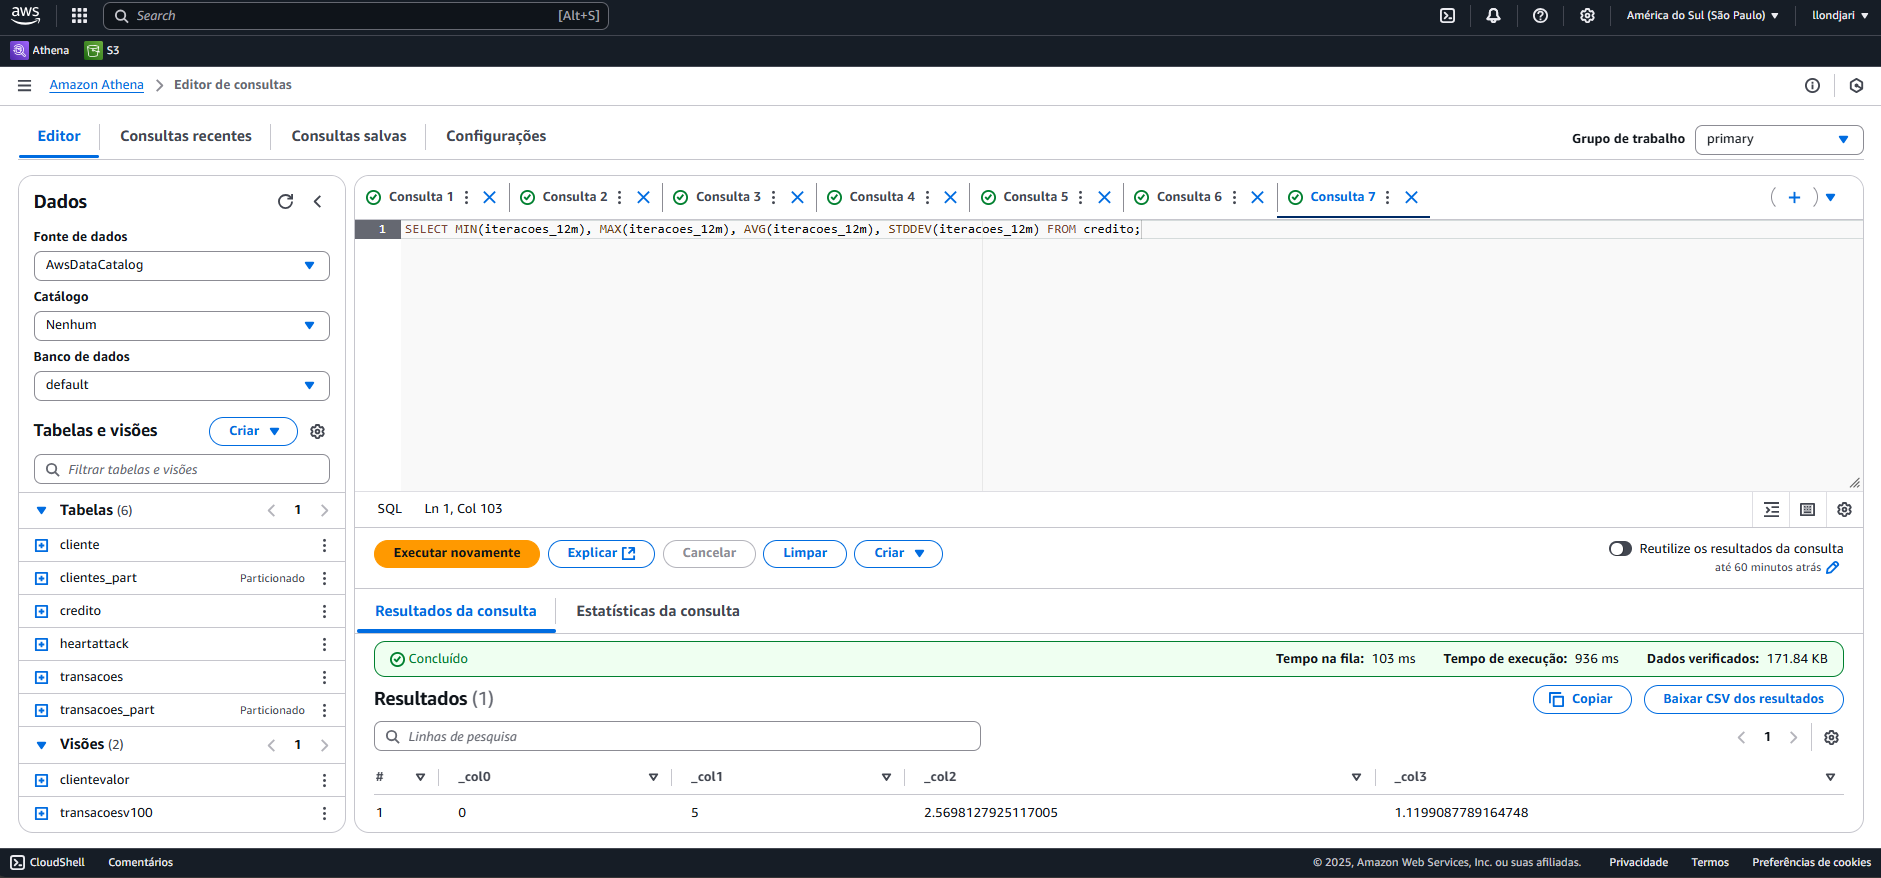

Para a coluna meses_inativo_12m:
```sql
SELECT MIN(meses_inativo_12m), MAX(meses_inativo_12m), AVG(meses_inativo_12m), STDDEV(meses_inativo_12m) FROM credito;
```
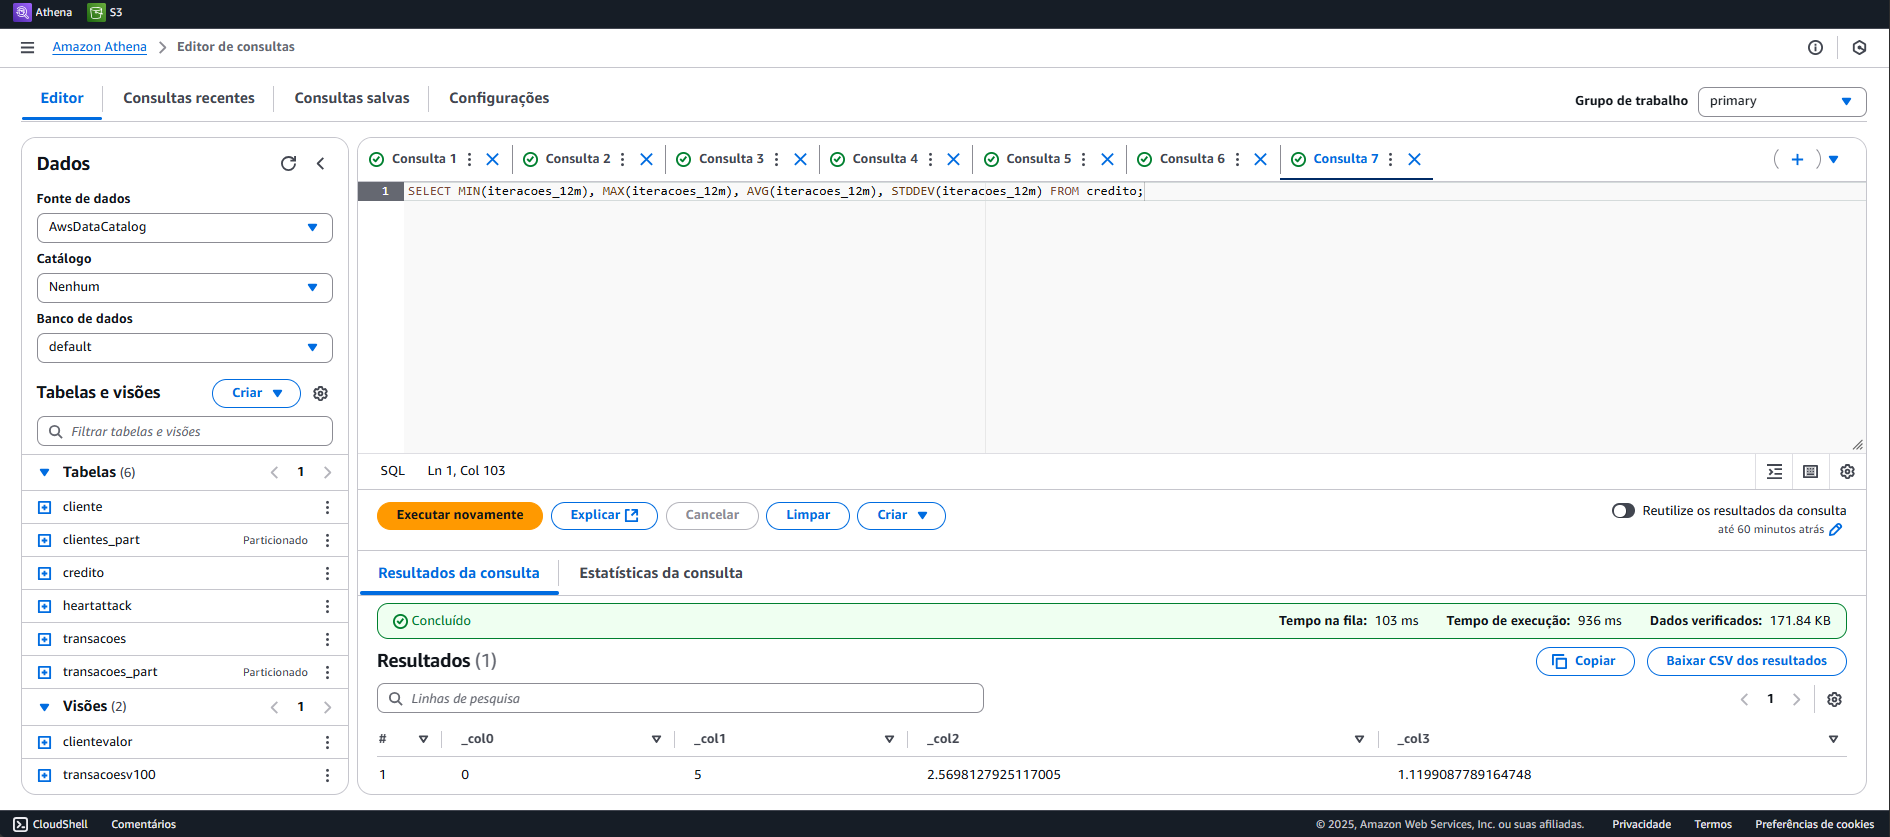

Para a coluna limite_credito:
```sql
SELECT MIN(limite_credito), MAX(limite_credito), AVG(limite_credito), STDDEV(limite_credito) FROM credito;
```
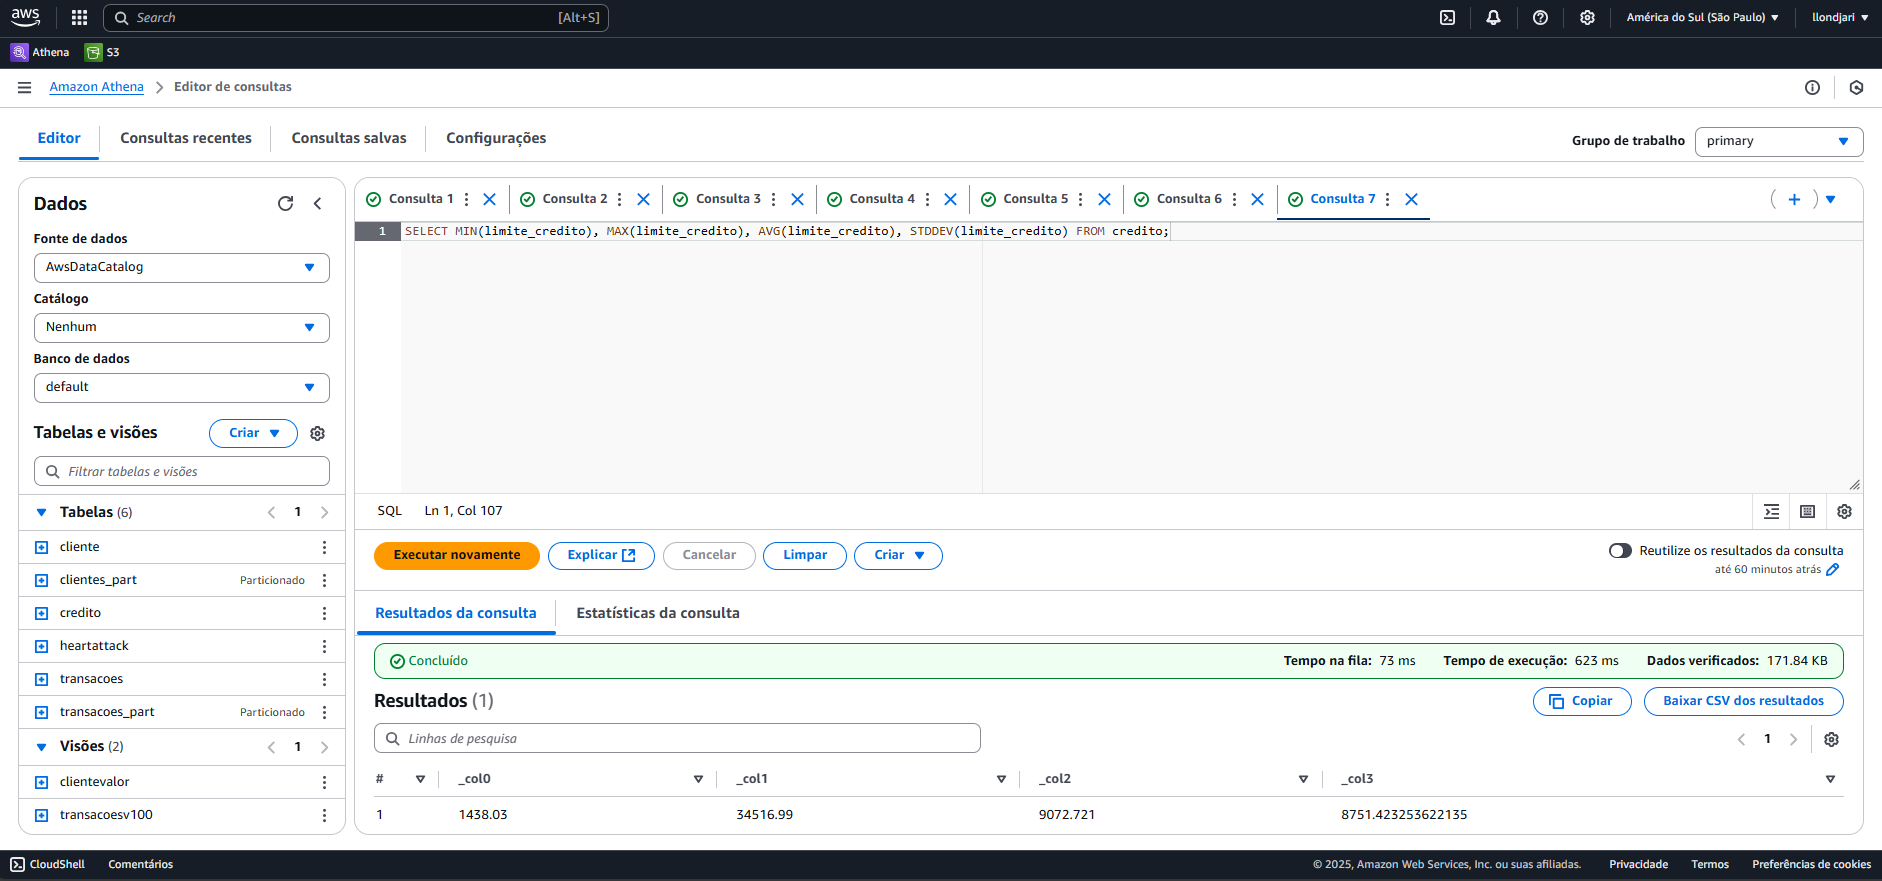

Para a coluna valor_transacoes_12m:
```sql
SELECT MIN(valor_transacoes_12m), MAX(valor_transacoes_12m), AVG(valor_transacoes_12m), STDDEV(**valor_transacoes_12m**) FROM credito;
```
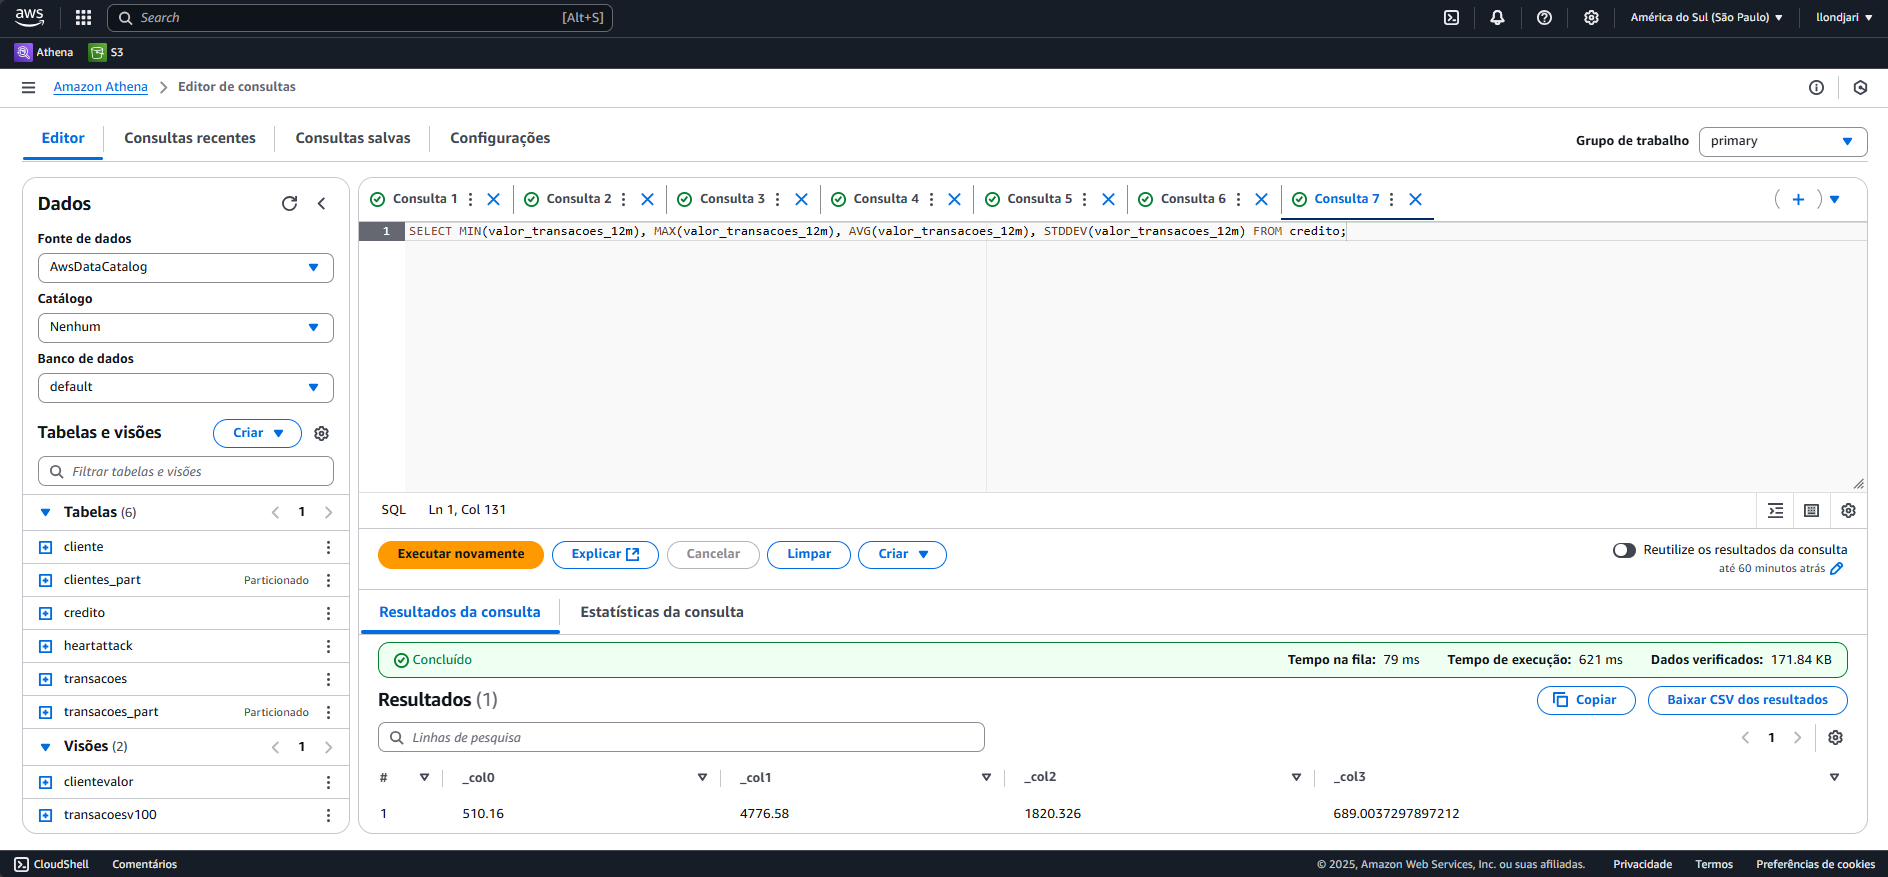

Para a coluna qtd_transacoes_12m:
```sql
SELECT MIN(qtd_transacoes_12m), MAX(qtd_transacoes_12m), AVG(qtd_transacoes_12m), STDDEV(qtd_transacoes_12m) FROM credito;
```
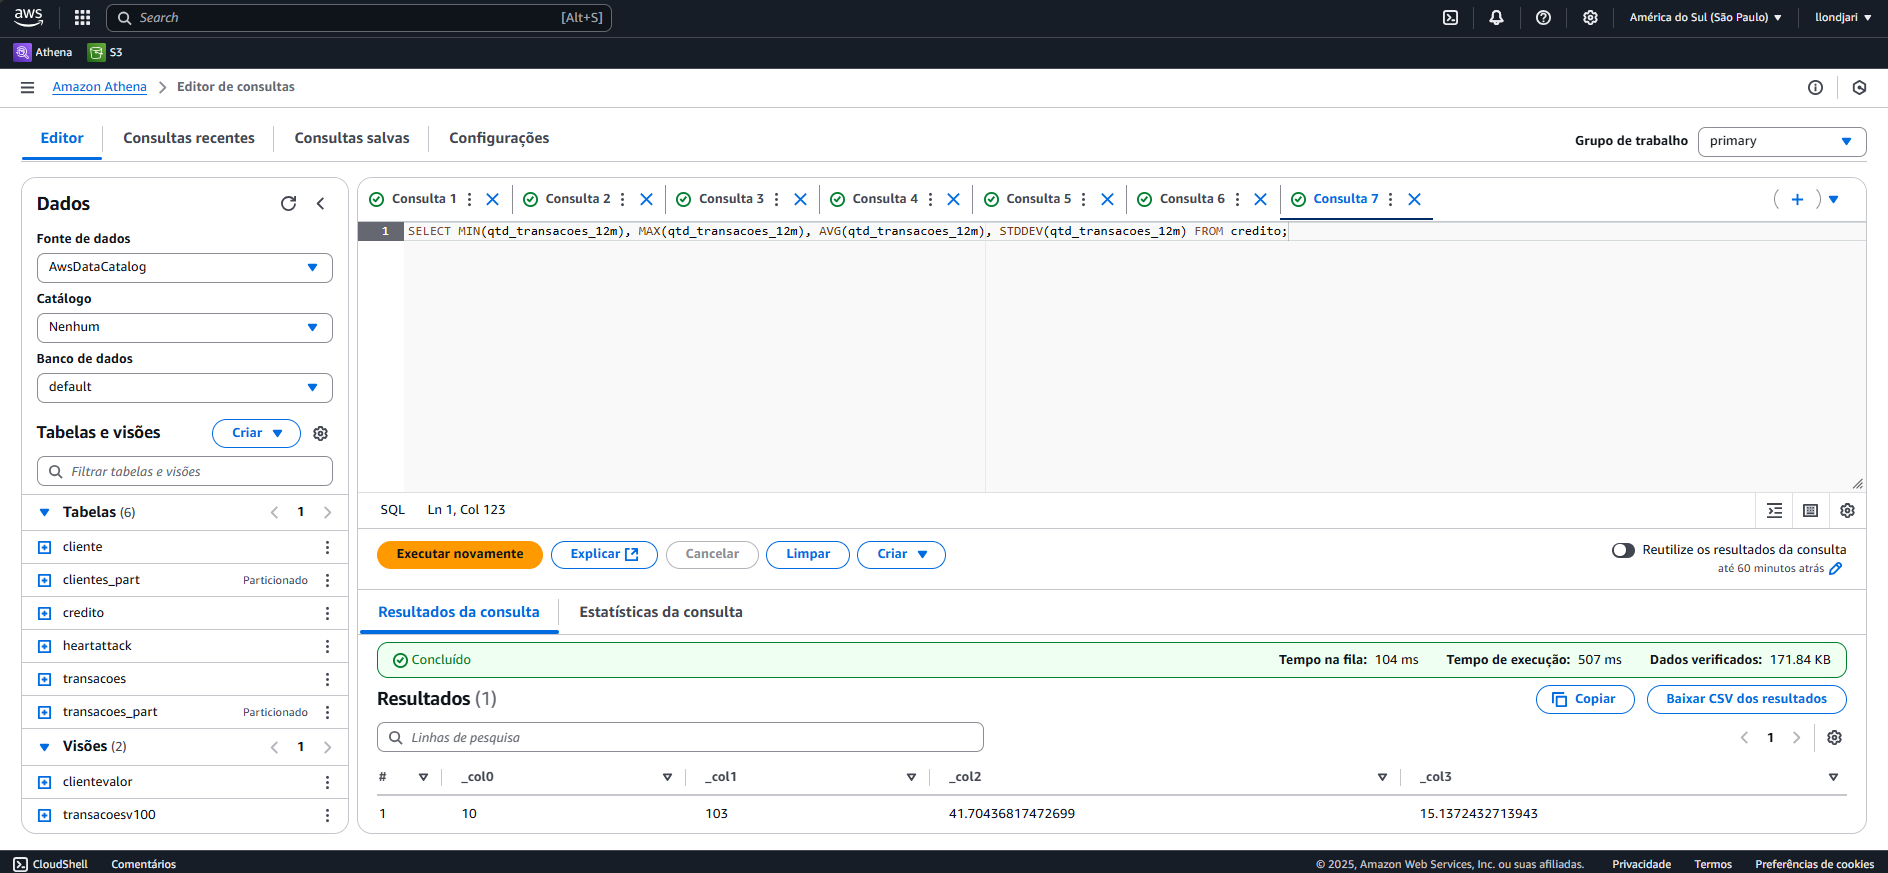

## **3.4 - Variáveis importantes**

### **3.4.1 Seleção e Ordenação**

* Mostrando os clientes com os maiores limites de crédito:

```sql
SELECT * FROM credito ORDER BY limite_credito DESC LIMIT 10;
```

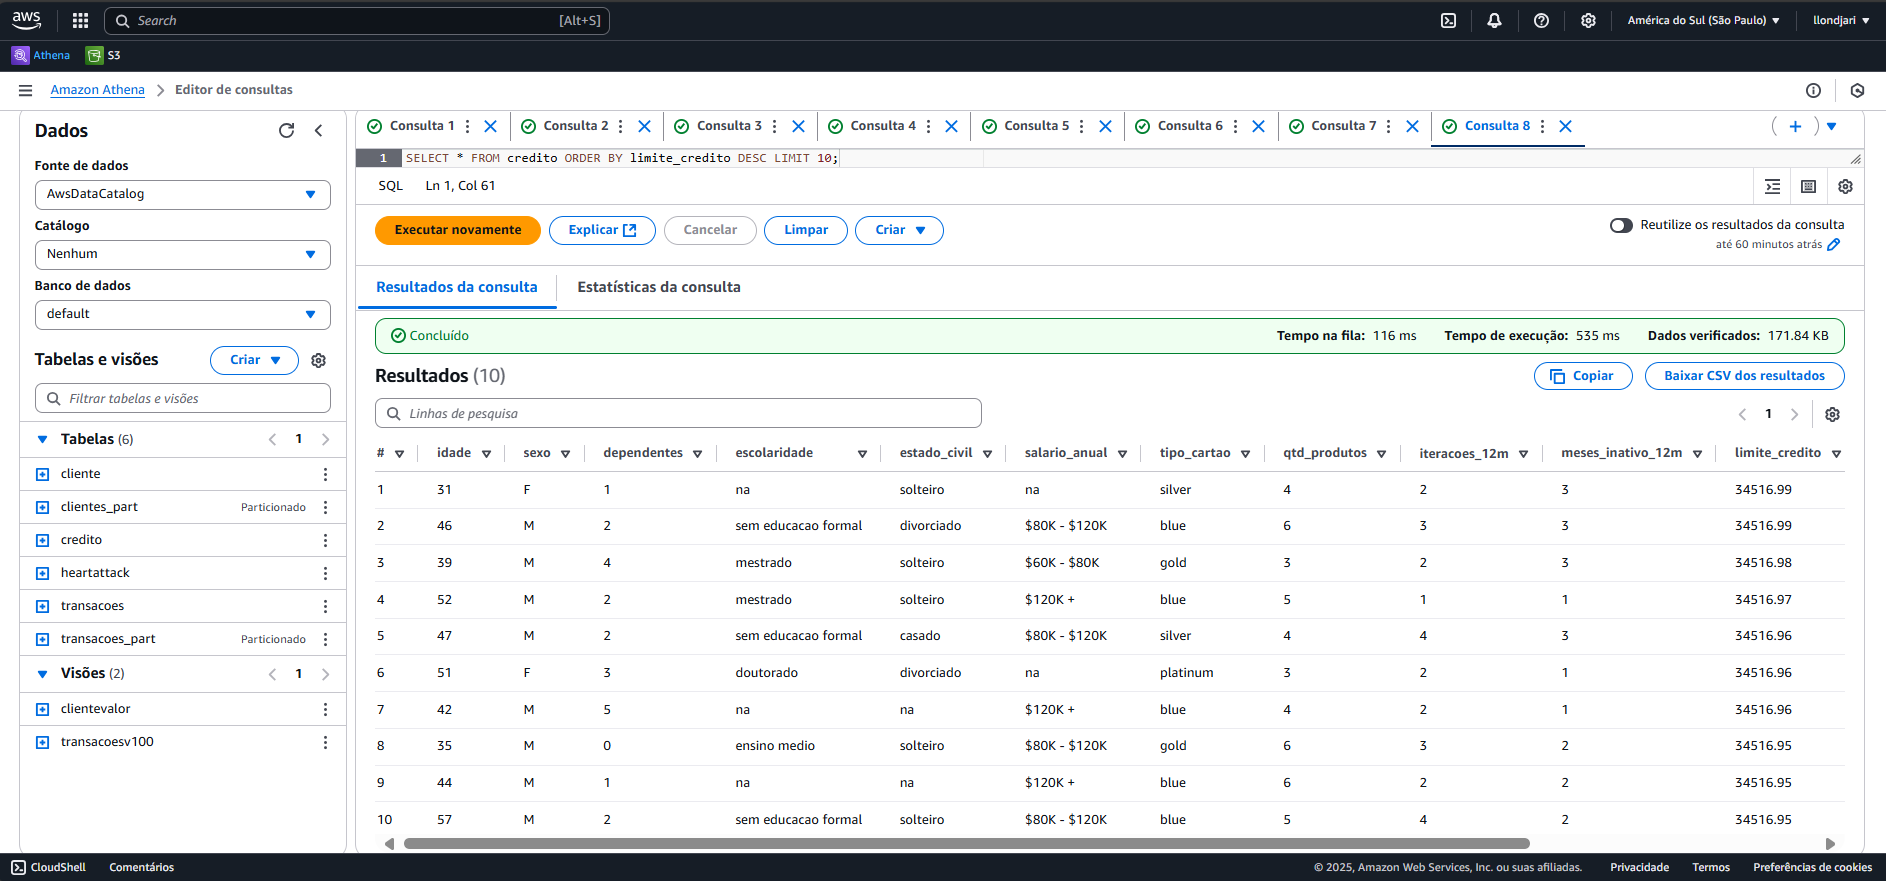

* Mostrando os clientes com as transações de maior valor em ordem decrescente:

```sql
SELECT * FROM credito ORDER BY valor_transacoes_12m DESC LIMIT 10;
```

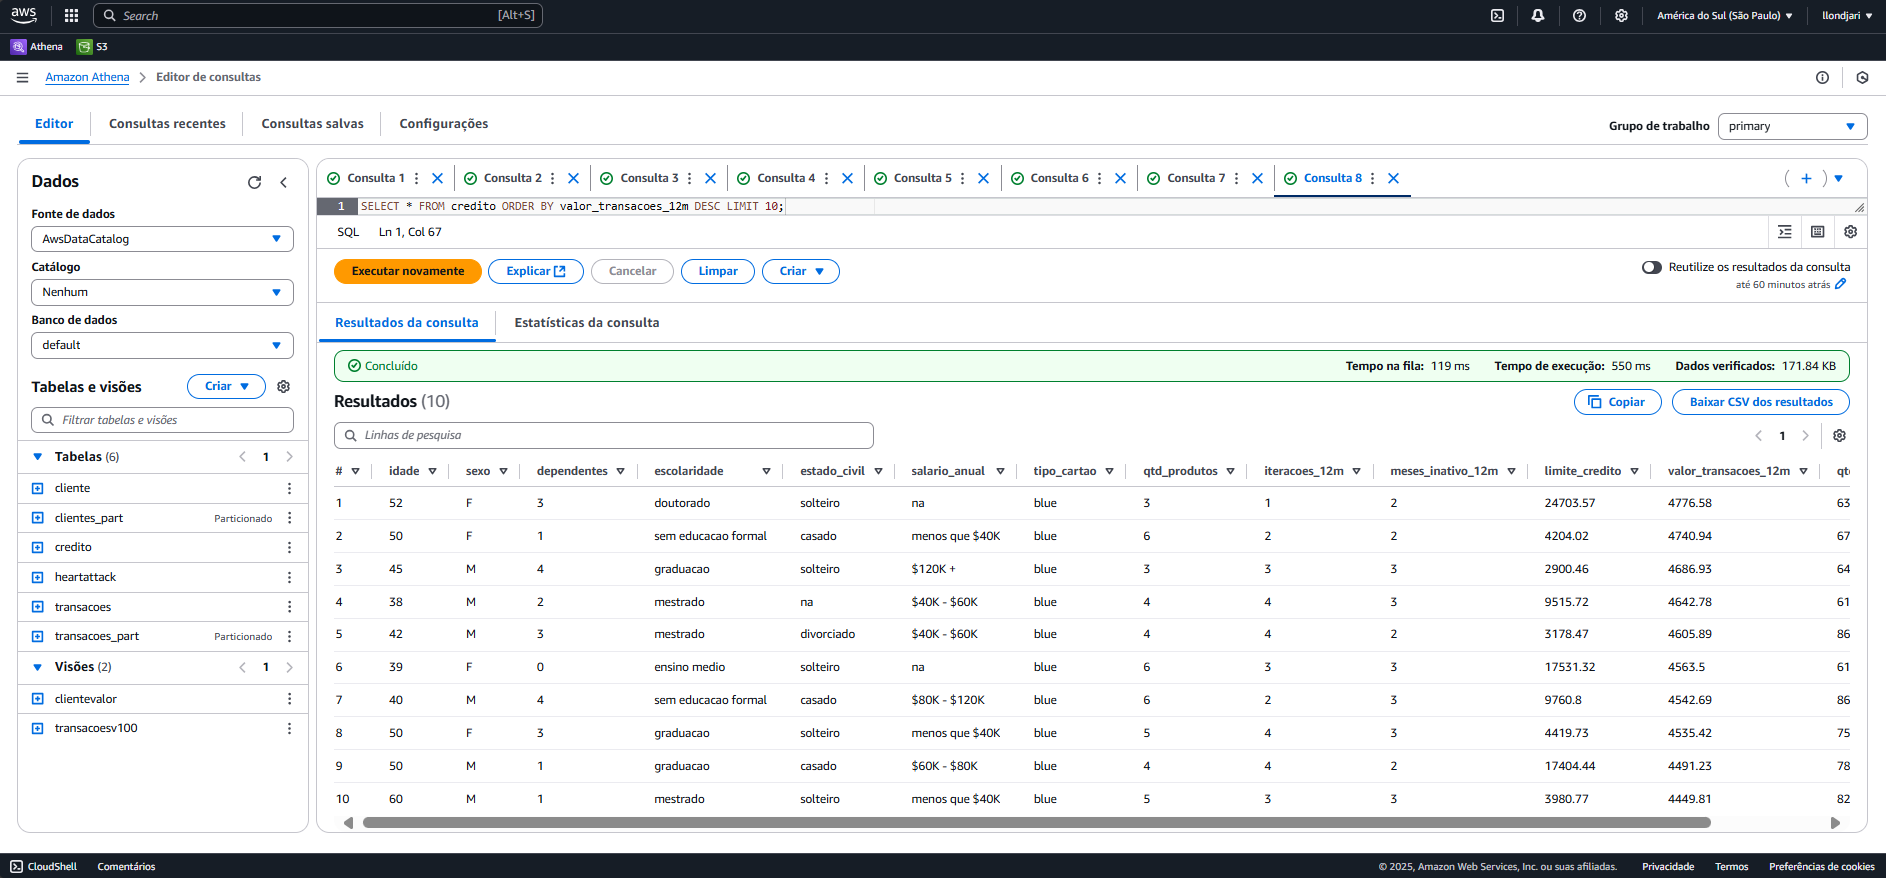

* Mostrando os clientes com as transações de maior valor em ordem crescente:

```sql
SELECT * FROM credito ORDER BY valor_transacoes_12m ASC LIMIT 10;
```
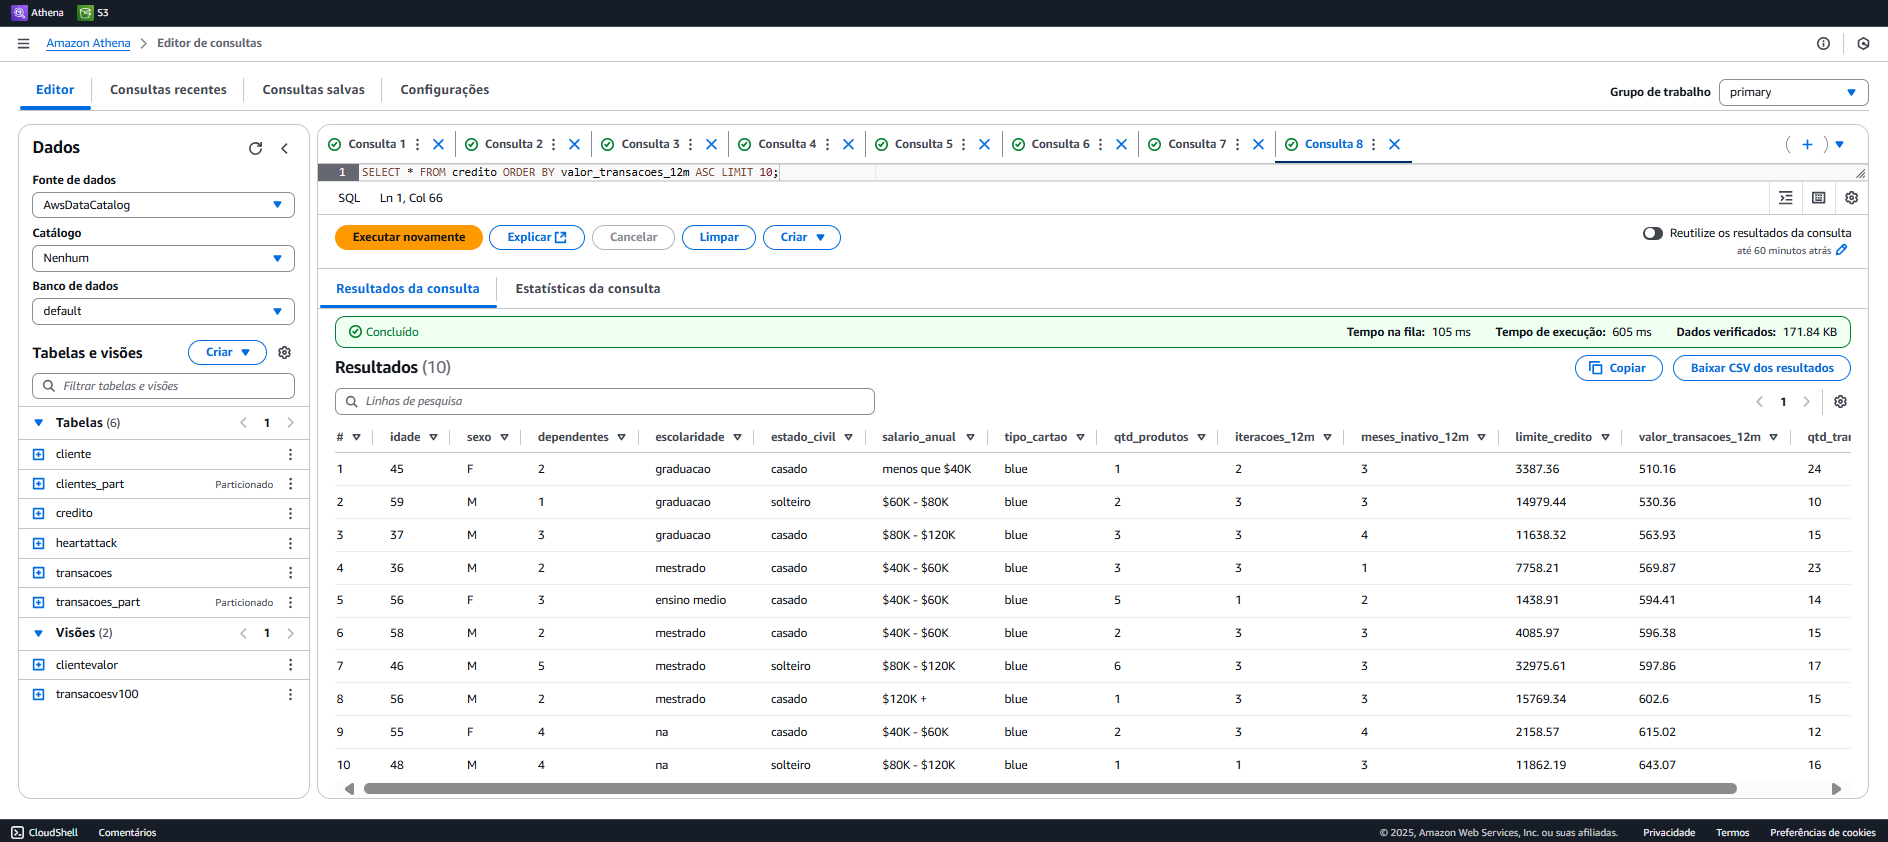

*  Mostrando os clientes que compraram uma maior quantidade de produtos:

```sql
SELECT * FROM credito ORDER BY qtd_produtos ASC LIMIT 10;
```

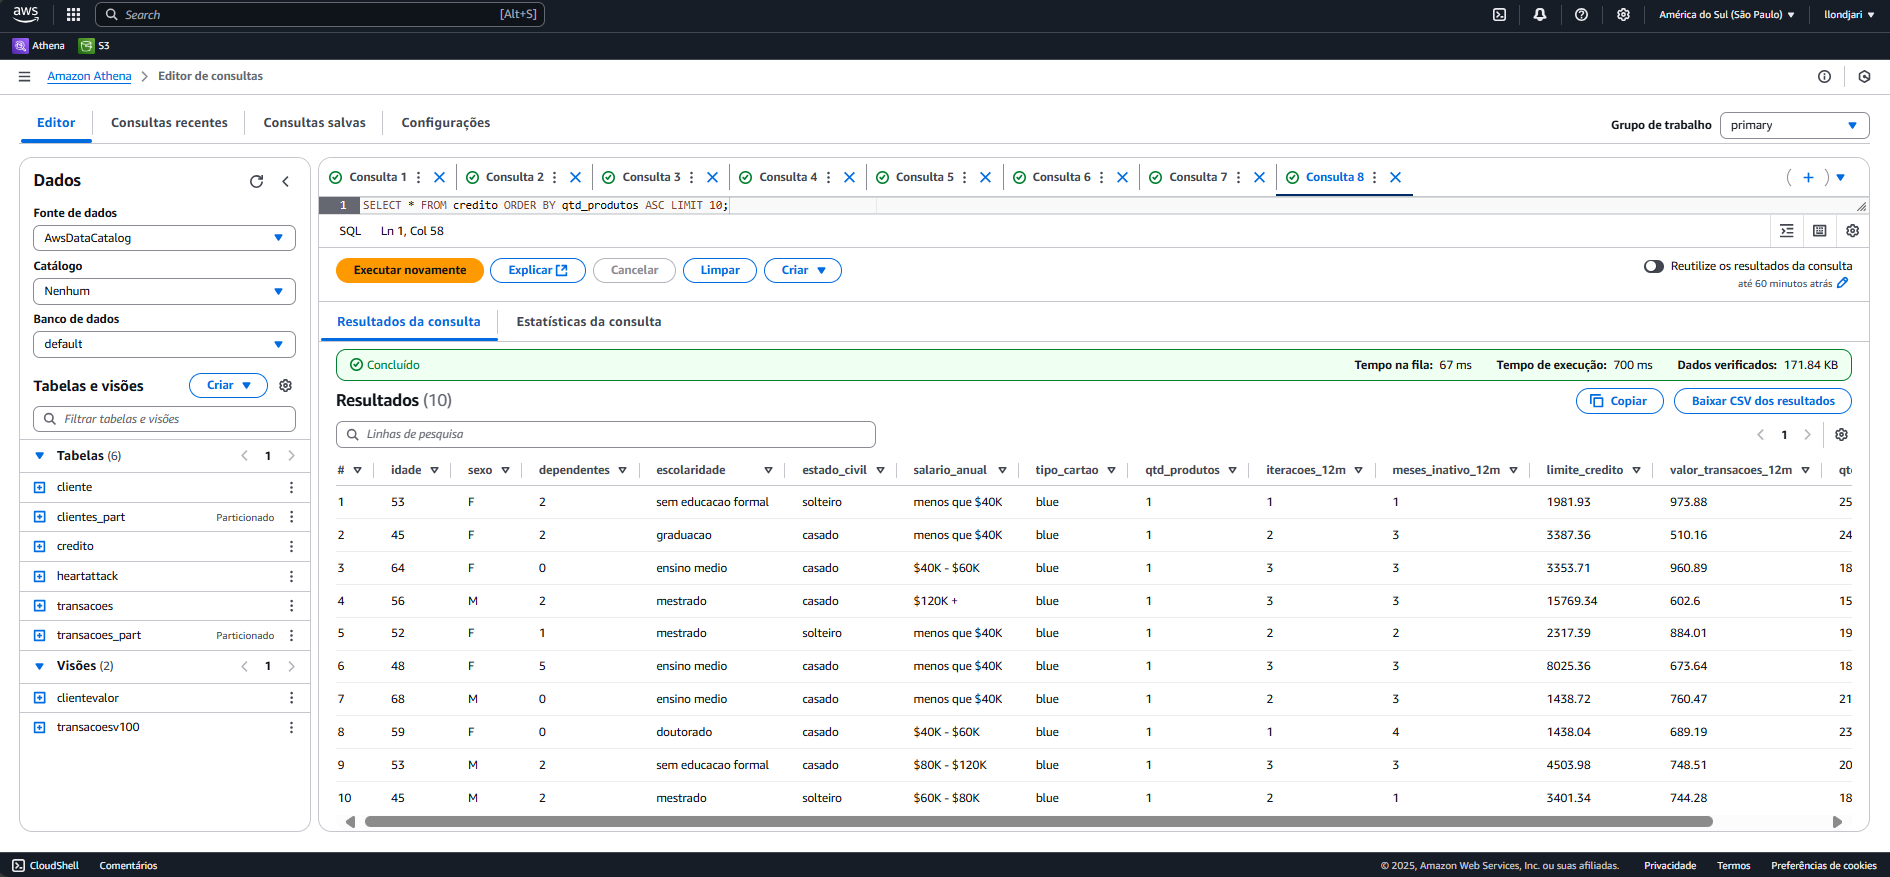

* Mostrando os clientes inativos há mais tempo:

```sql
SELECT * FROM credito ORDER BY meses_inativo_12m DESC LIMIT 10;
```

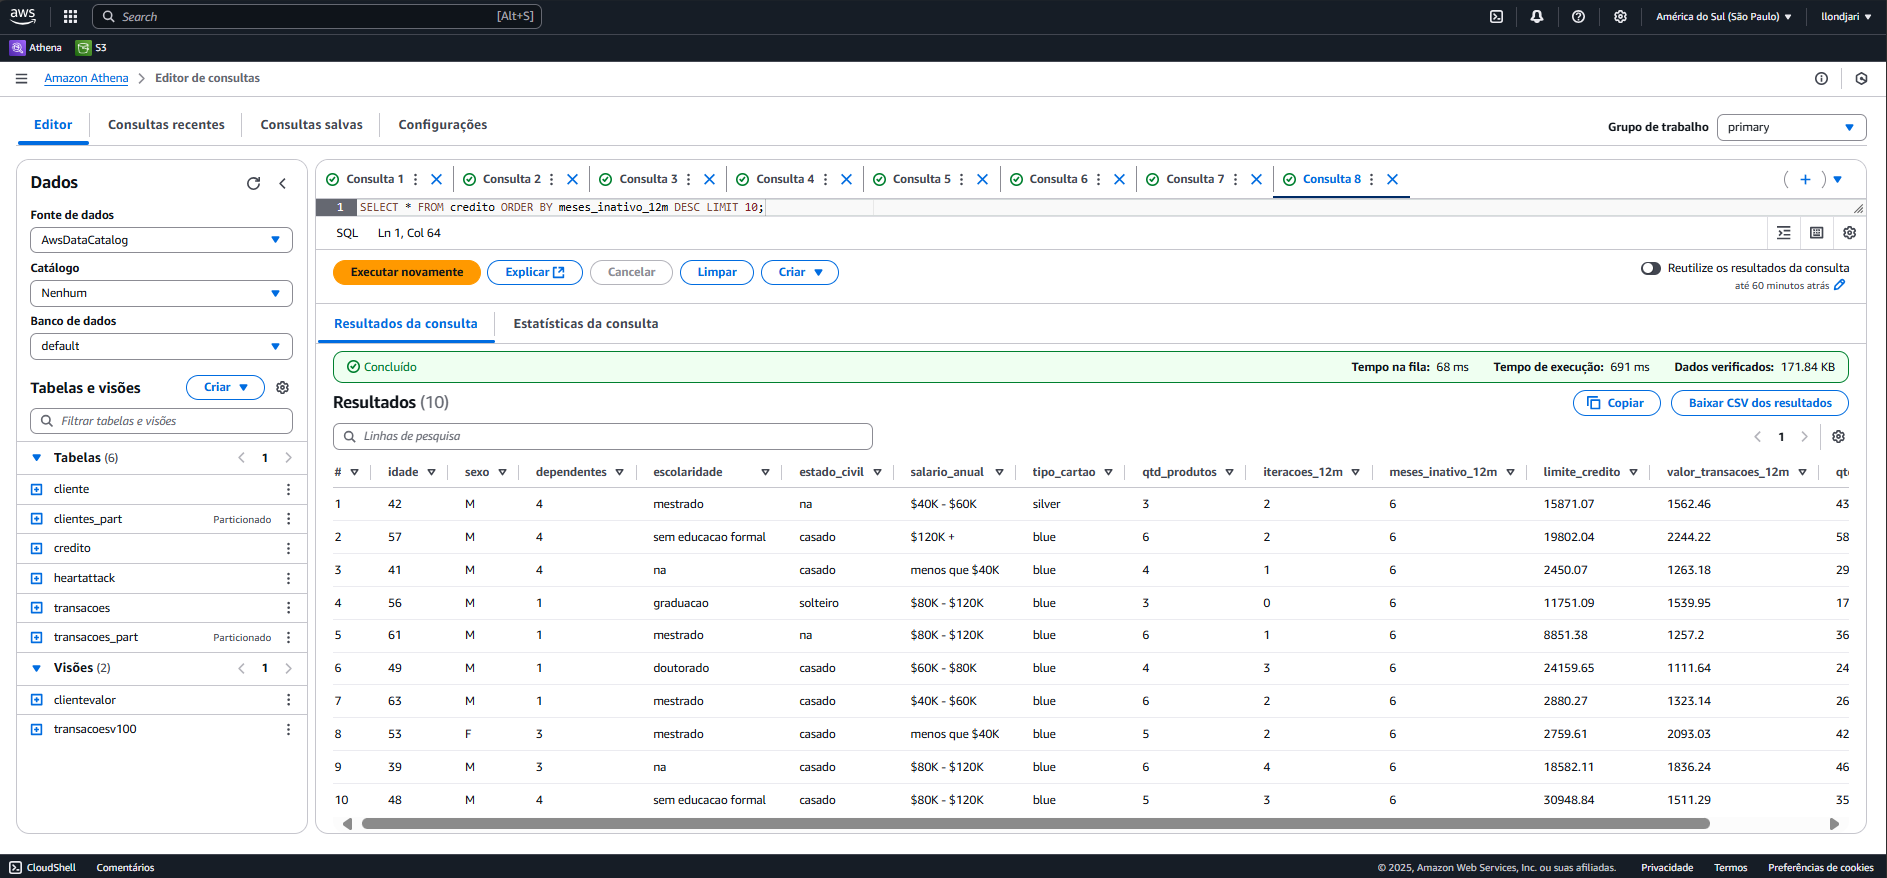

### **3.4.2 - Filtragem de dados**

* Filtro para clientes inativos:

```sql
SELECT * FROM credito WHERE meses_inativo_12m > 4;
```

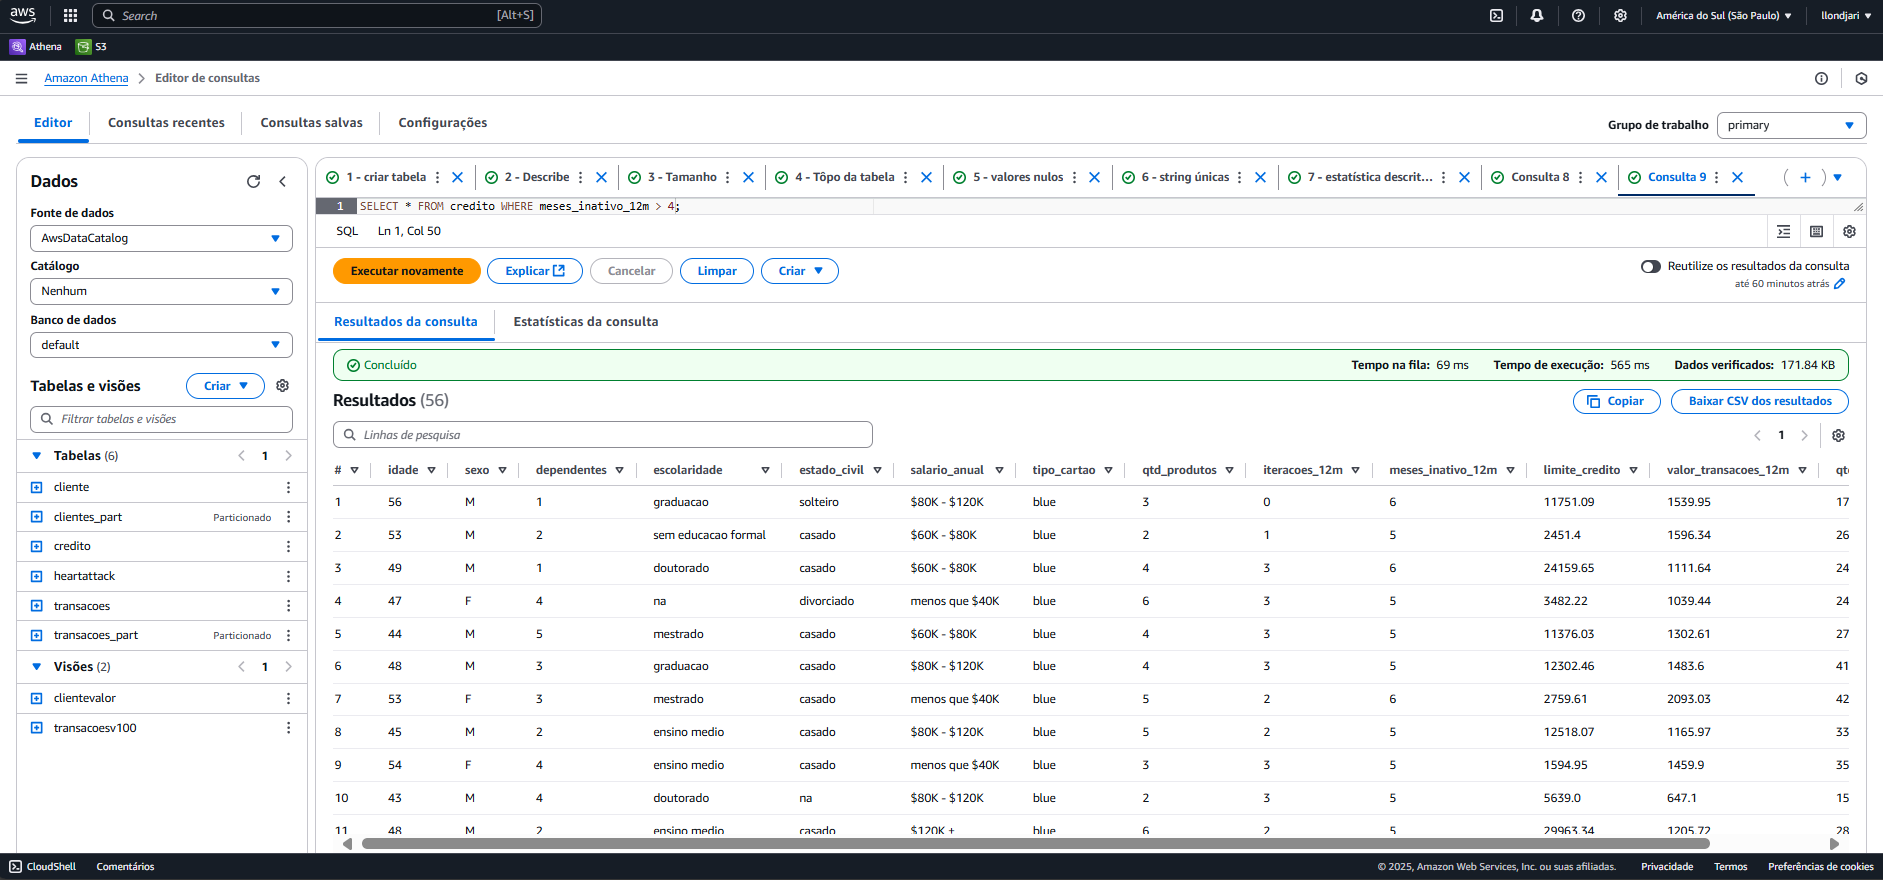

* Filtro por idade entre 24 e 35 anos

```sql
SELECT * FROM credito WHERE idade BETWEEN 25 AND 35;
```

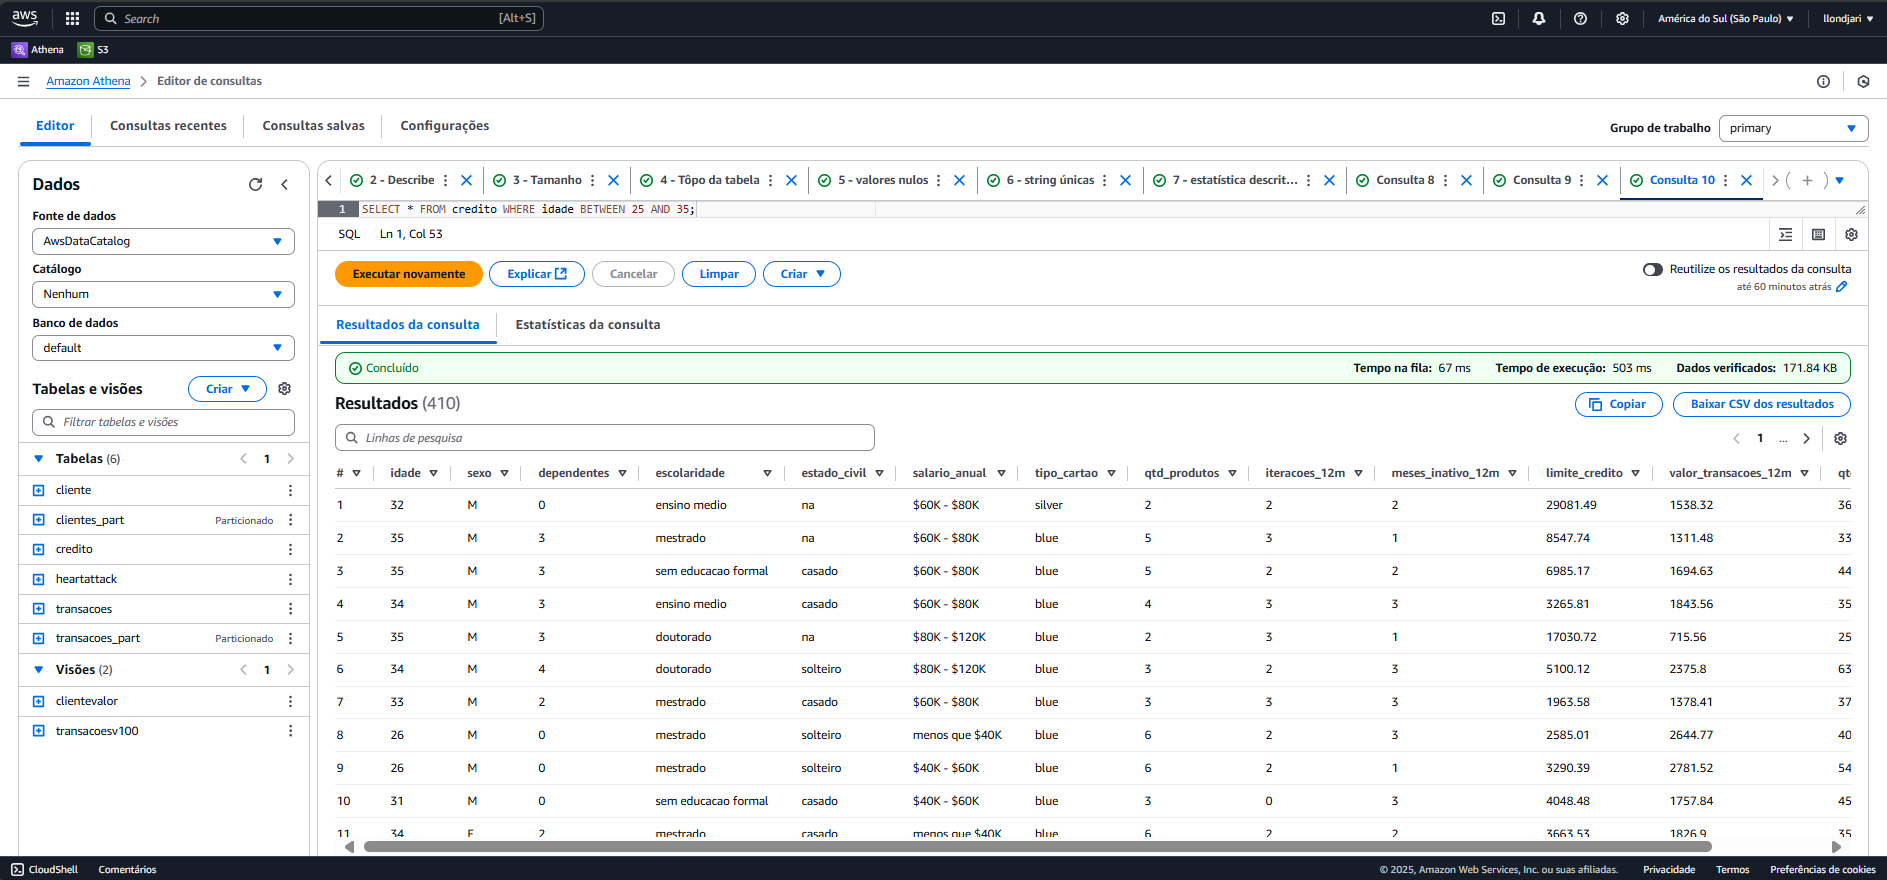

* Filtro por sexo e escolaridade:

```sql
SELECT * FROM credito WHERE sexo = 'F' AND escolaridade = 'mestrado';
```

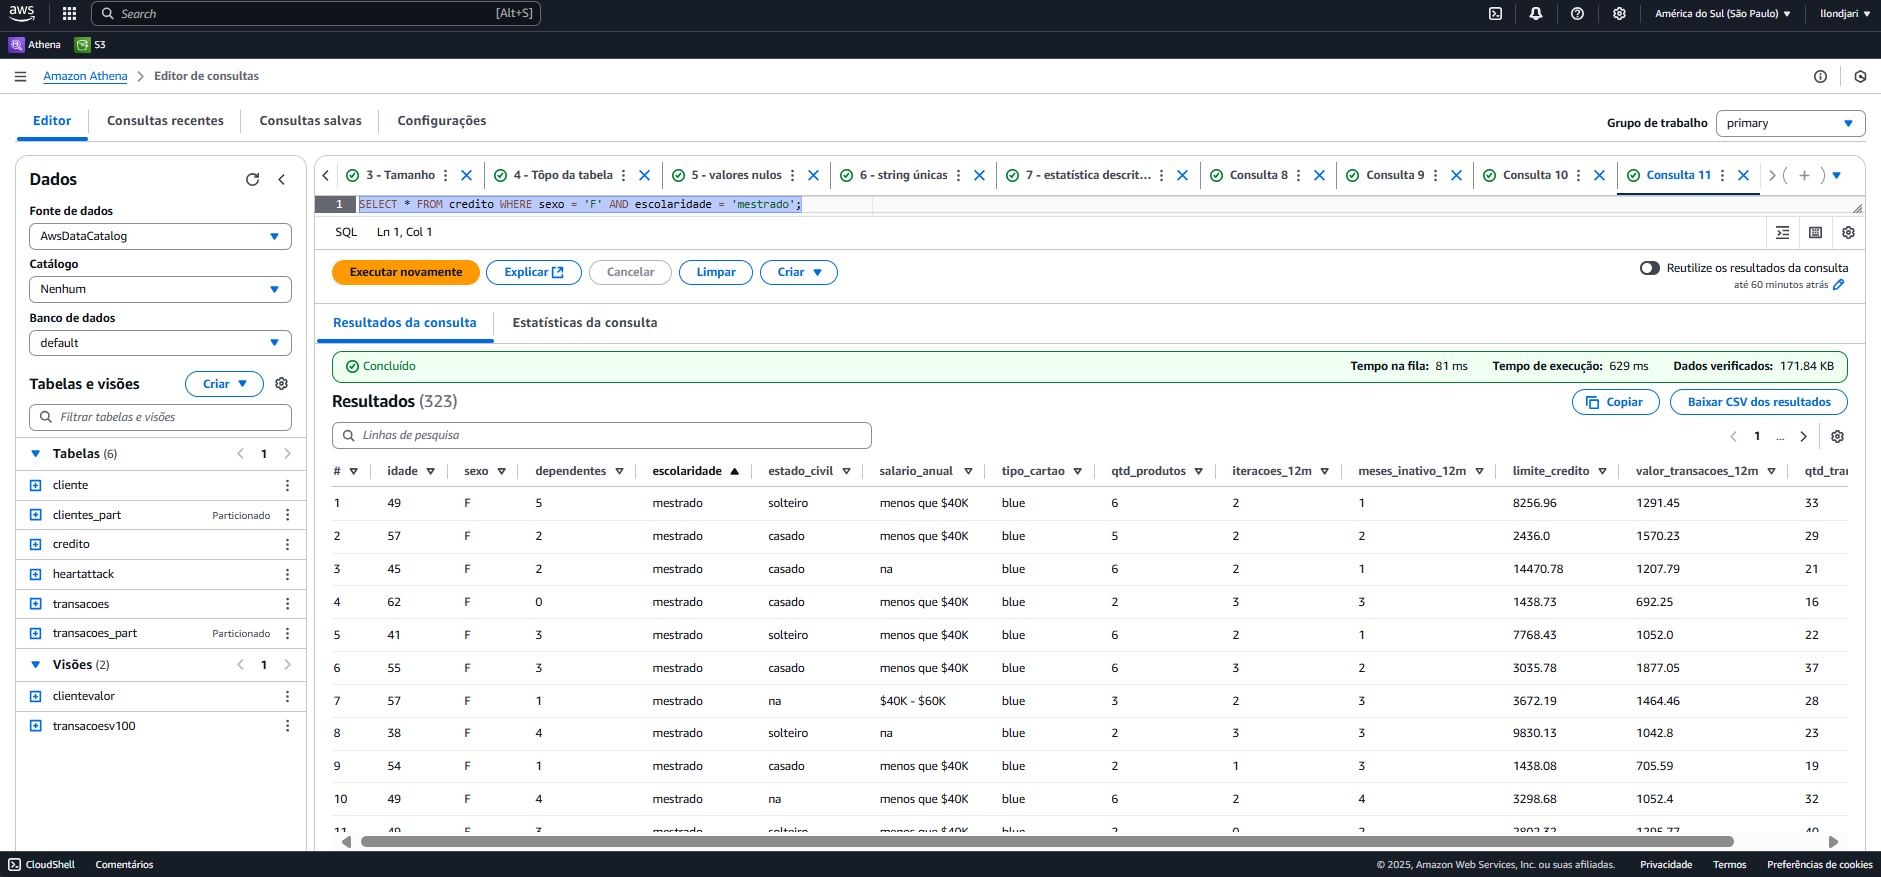

* Filtro por tipo de cartão e quantidade de produtos:

```sql
SELECT * FROM credito WHERE tipo_cartao = 'gold' AND qtd_produtos > 5;
```

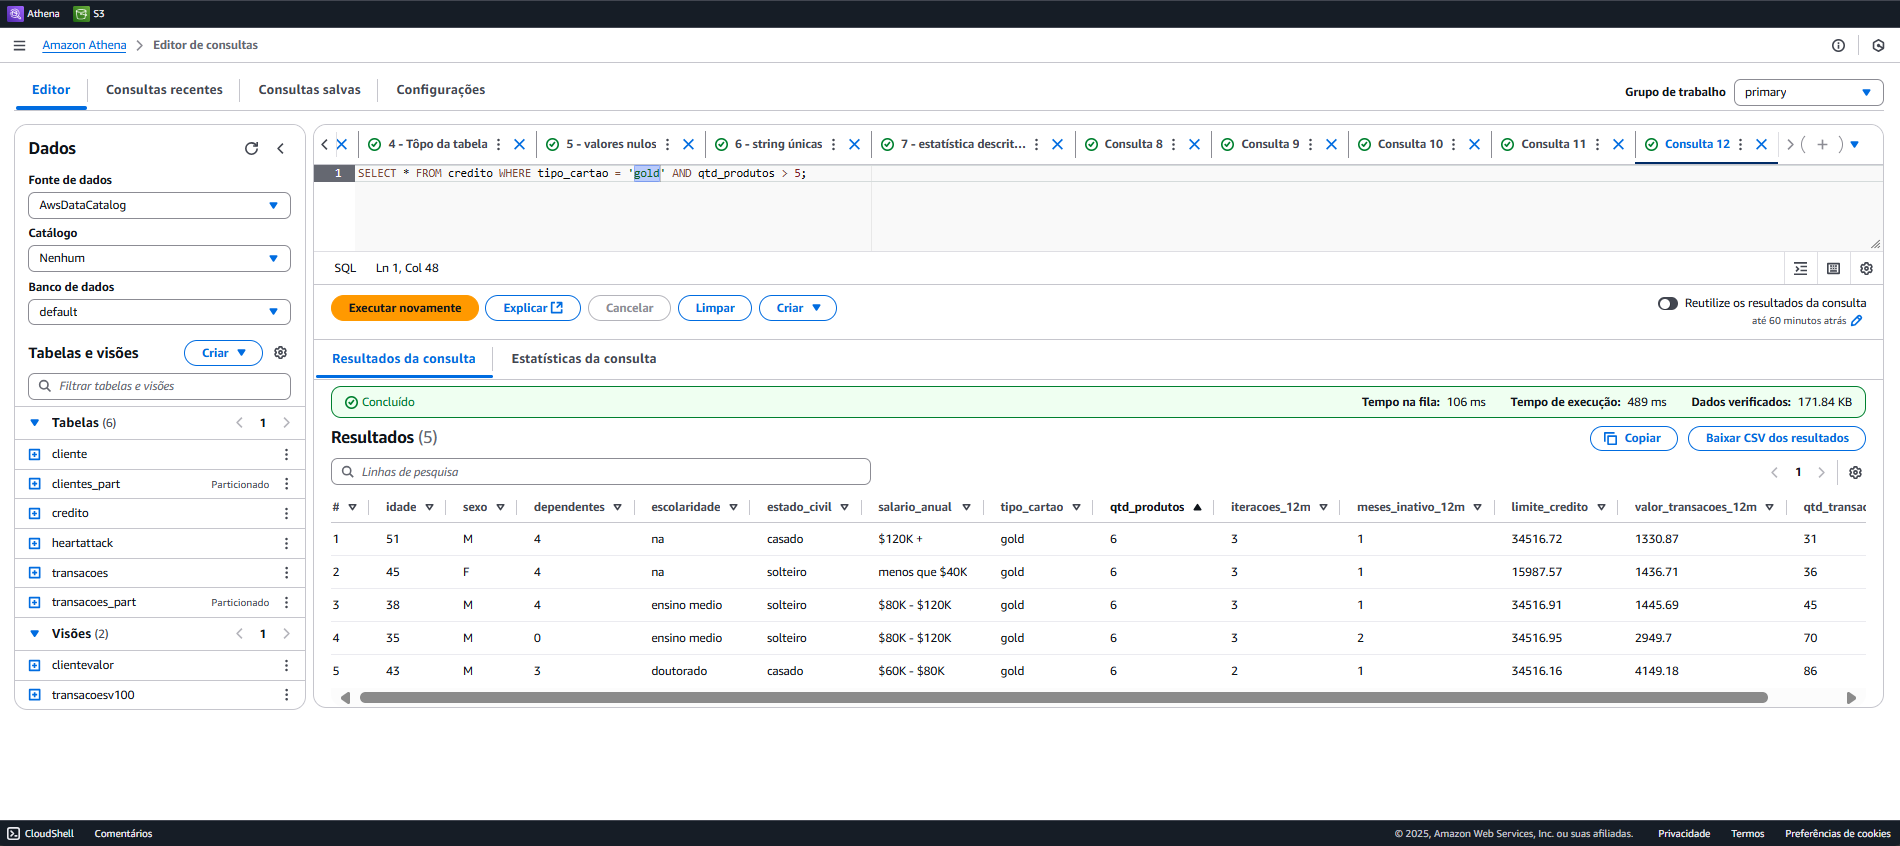

* Combinando filtros com operadores lógicos:

```sql
SELECT * FROM credito WHERE (idade > 30 OR salario_anual = '$80K - $120K') AND meses_inativo_12m < 3;
```

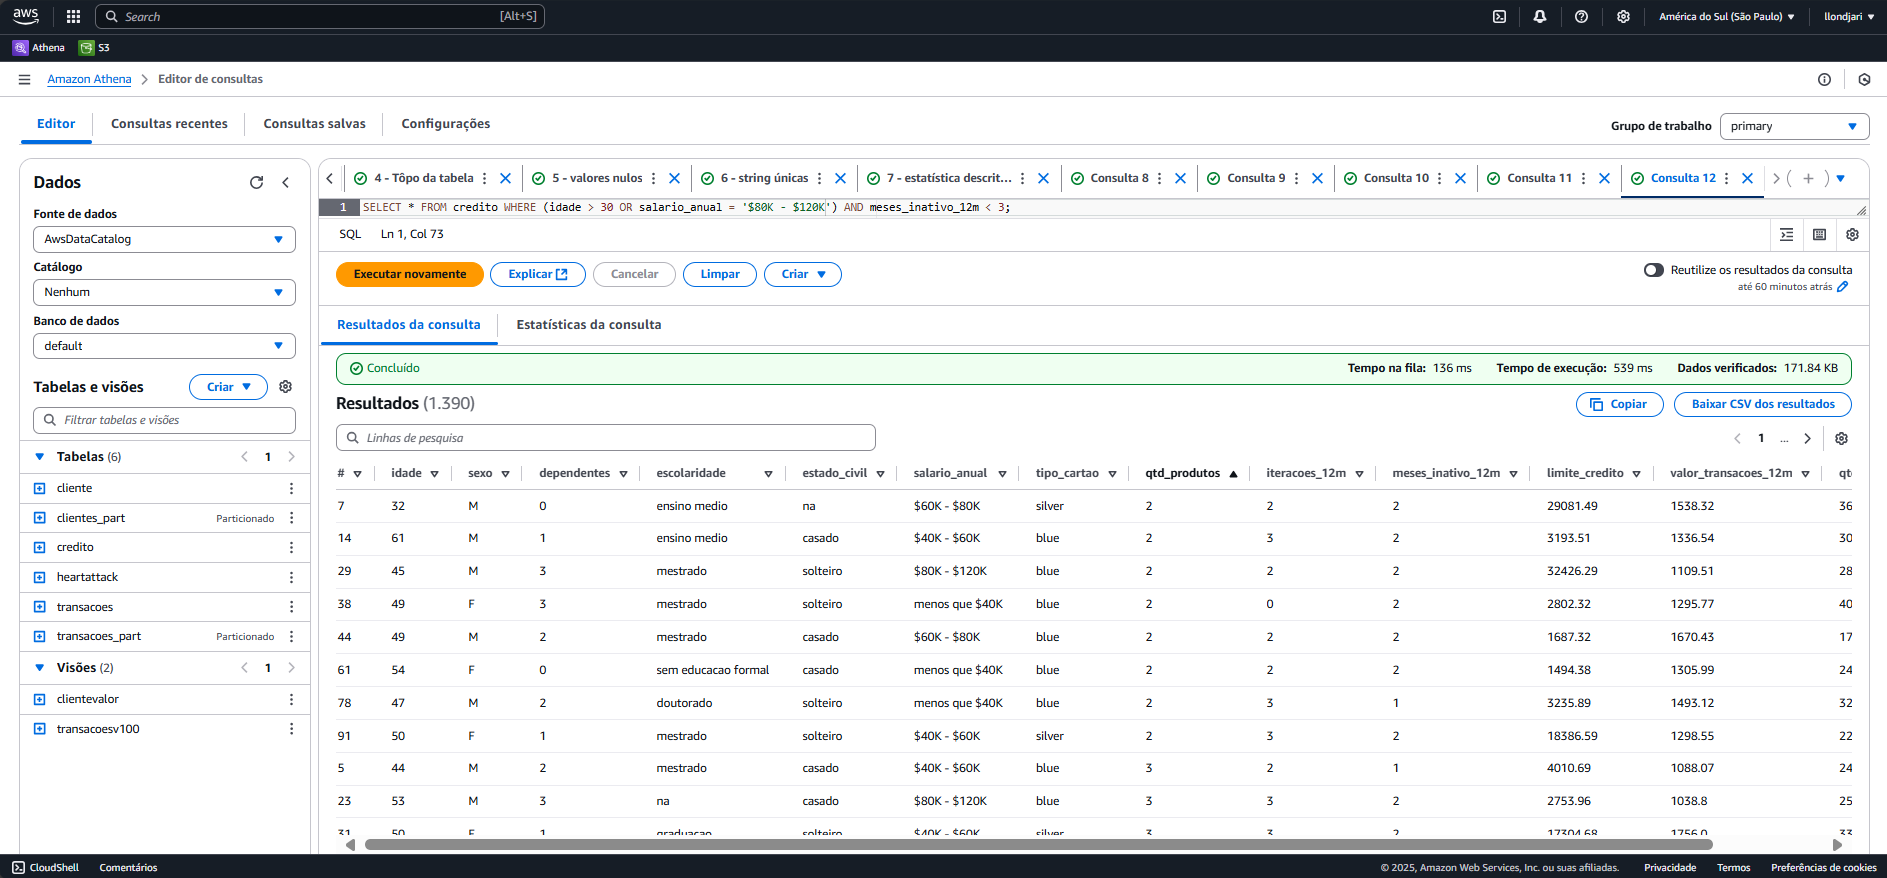

* Filtrando por valores de transações:

```sql
SELECT * FROM credito WHERE valor_transacoes_12m > 4500;
```

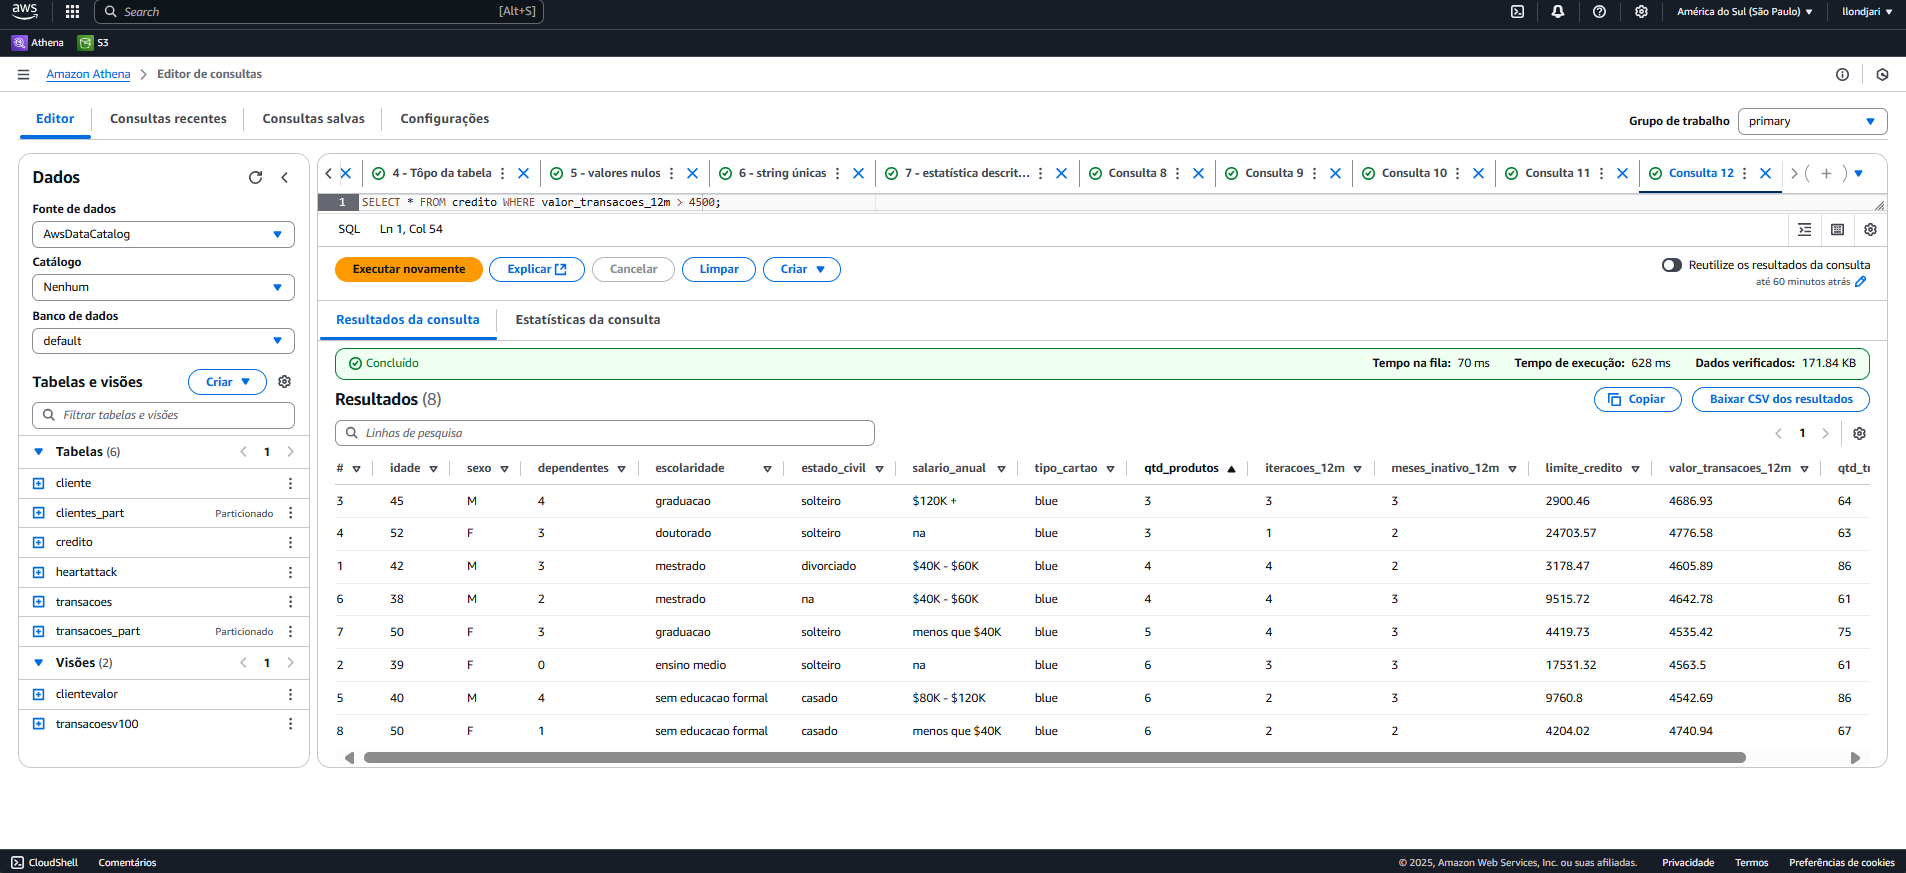

* Filtro por quantidade de transações e iterações:

```sql
SELECT * FROM credito WHERE qtd_transacoes_12m > 100 AND iteracoes_12m < 5;
```

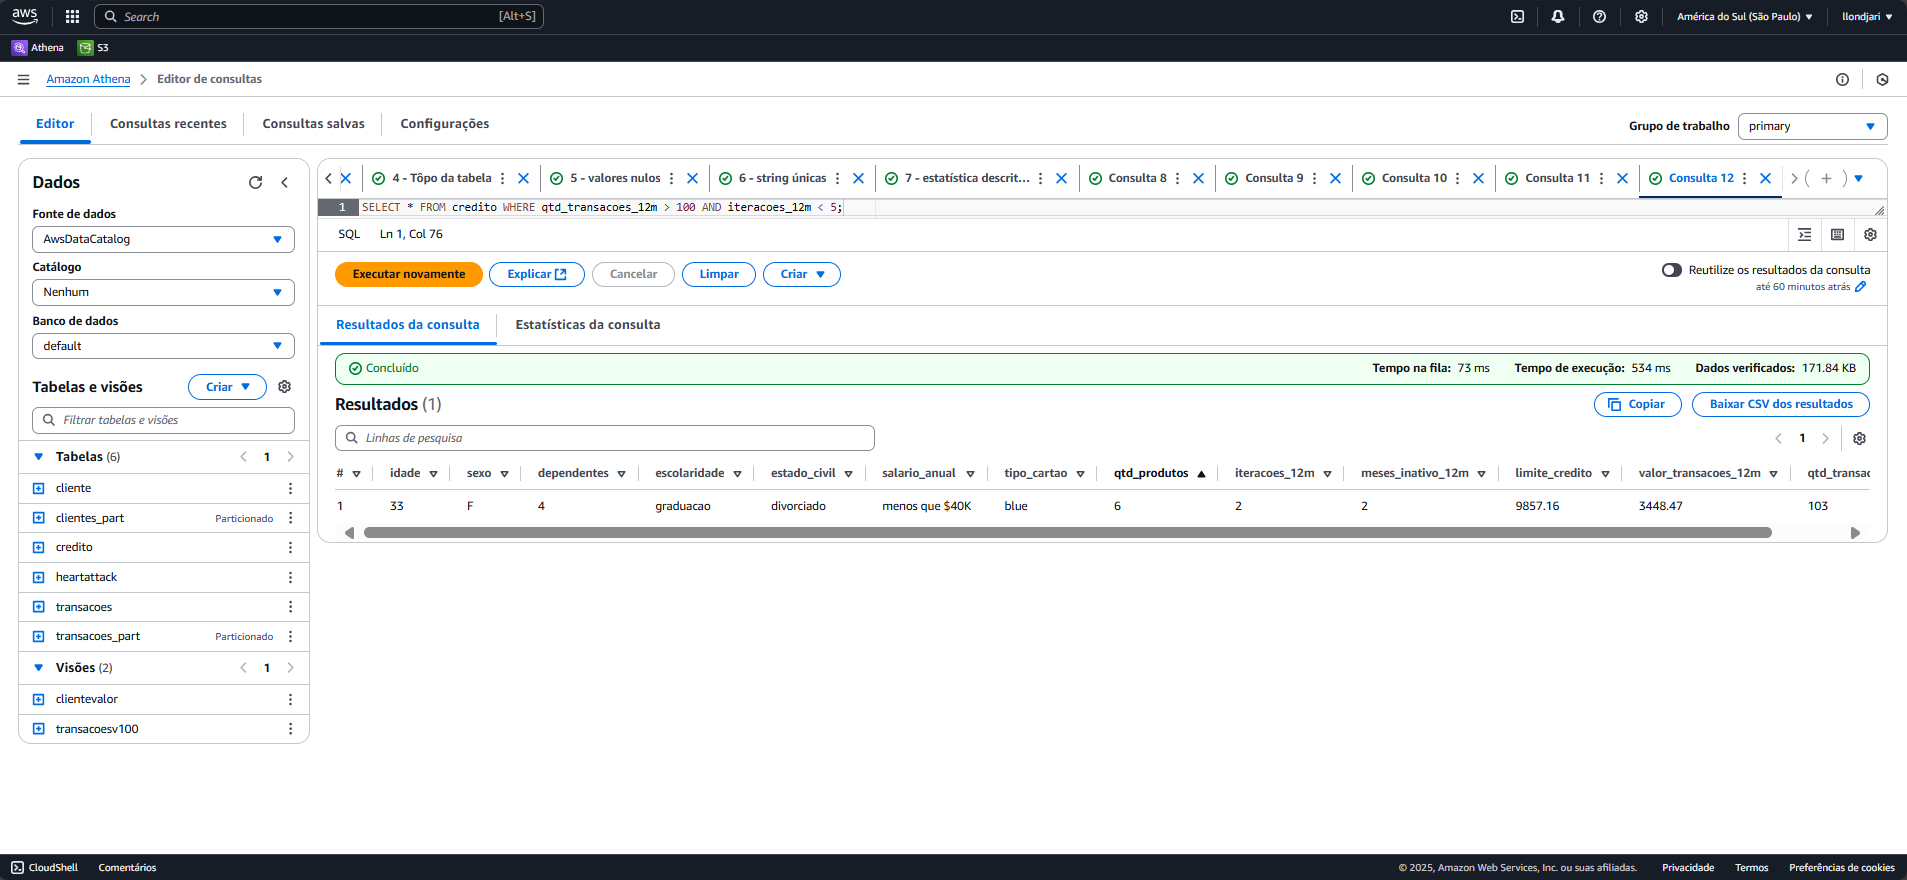

## **3.5 - Relação entre as variáveis**

### **3.5.1 Agrupamento e agregação de valores**

 * Agrupa os dados por uma coluna e calcula estatísticas agregadas para outras colunas, revelando padrões e relações entre as variáveis.

Agrupamento e agregação:

```sql
SELECT sexo, AVG(limite_credito) FROM credito GROUP BY sexo;
```

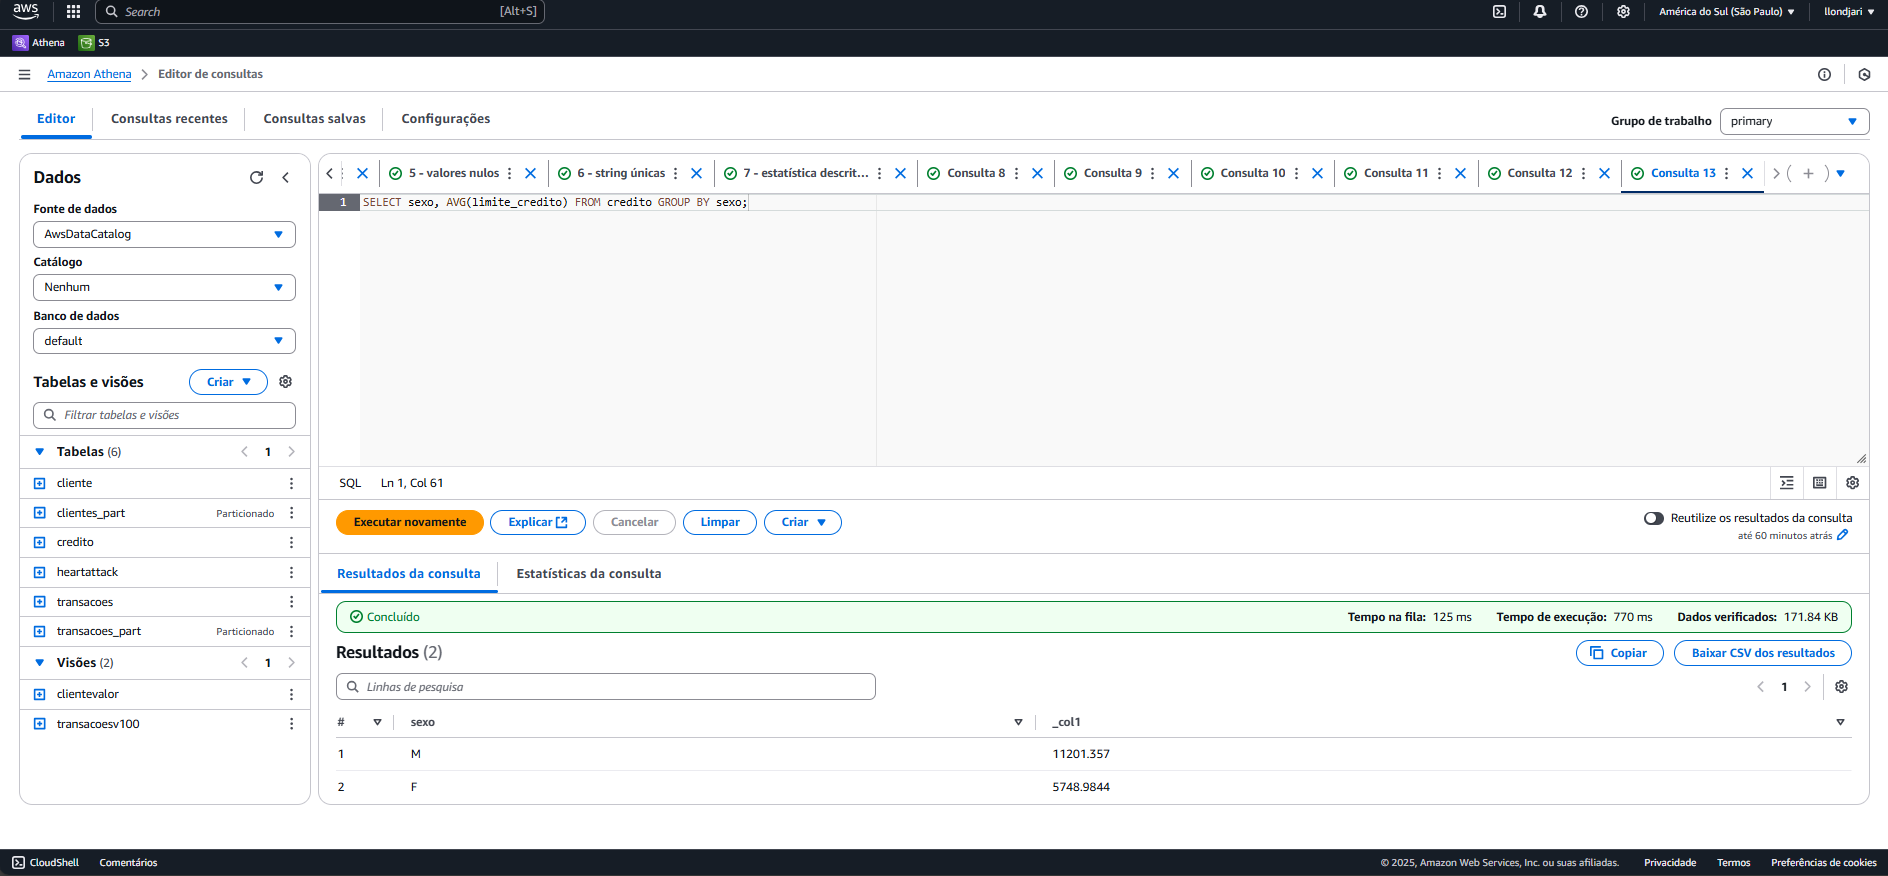

* Visualizando a média da quantidade de transações agrupadas por escolaridade:

```sql
SELECT escolaridade, AVG(qtd_transacoes_12m) FROM credito GROUP BY escolaridade;
```

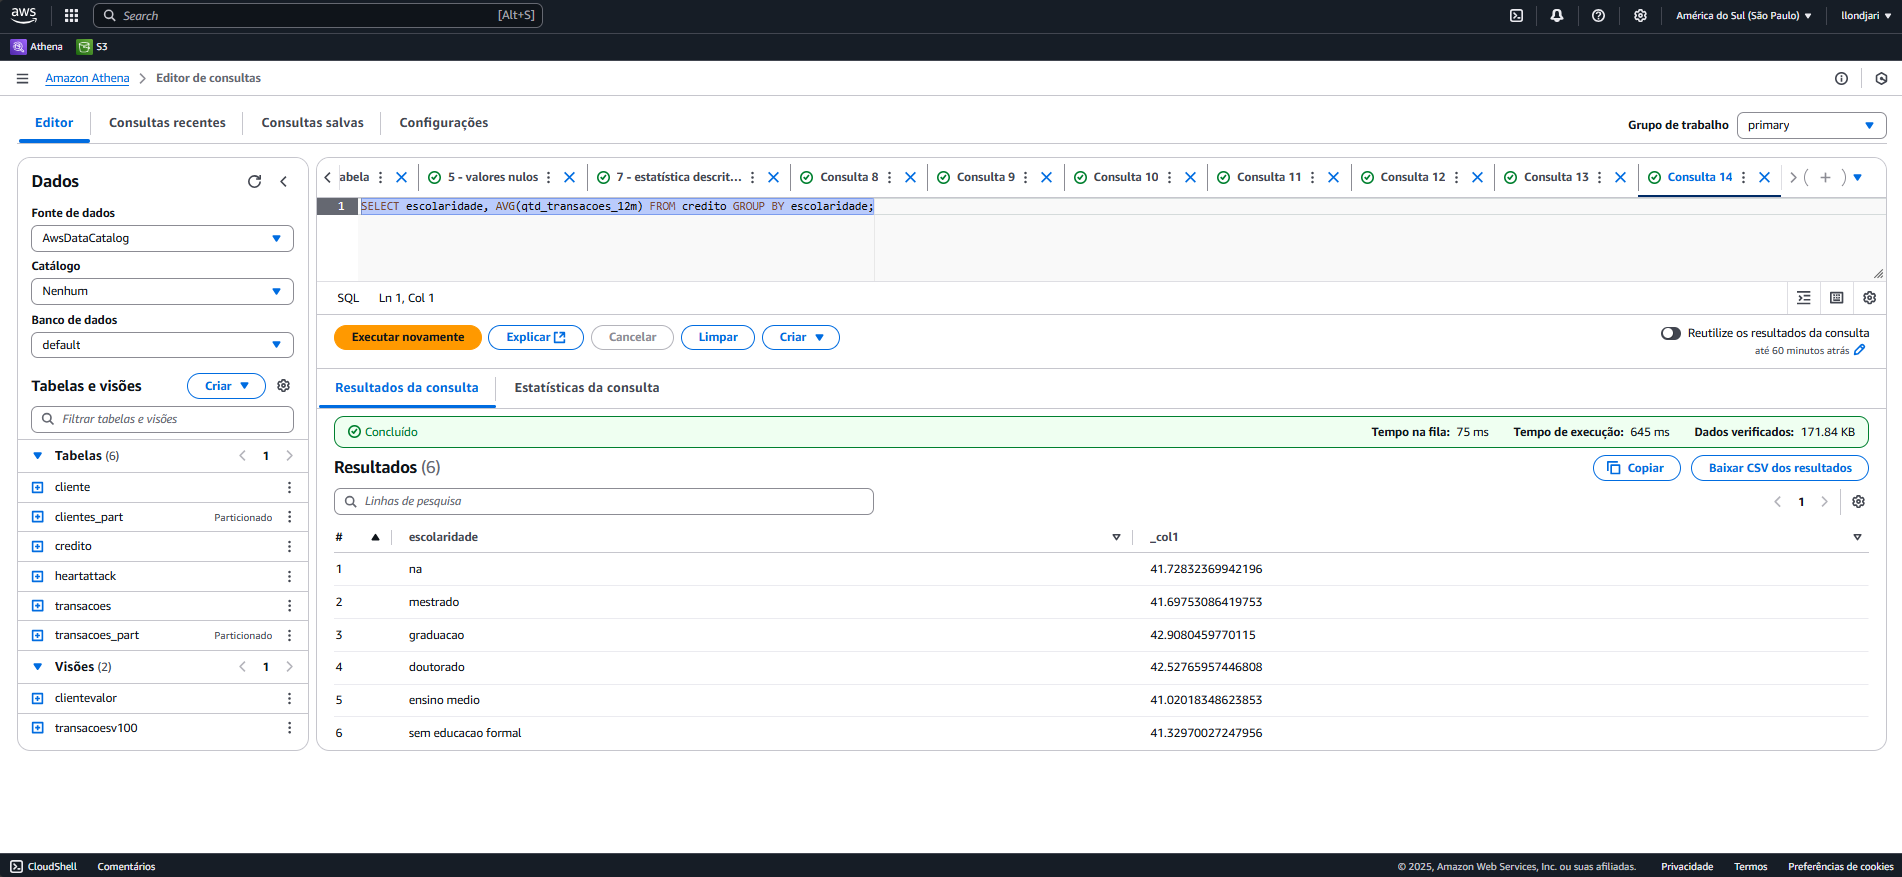

### **3.5.2 Combinação de valores**

*  Combinação de escolaridade, tipo_cartao e sexo que resulta no maior limite_credito:

```sql
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito desc
limit 10
```

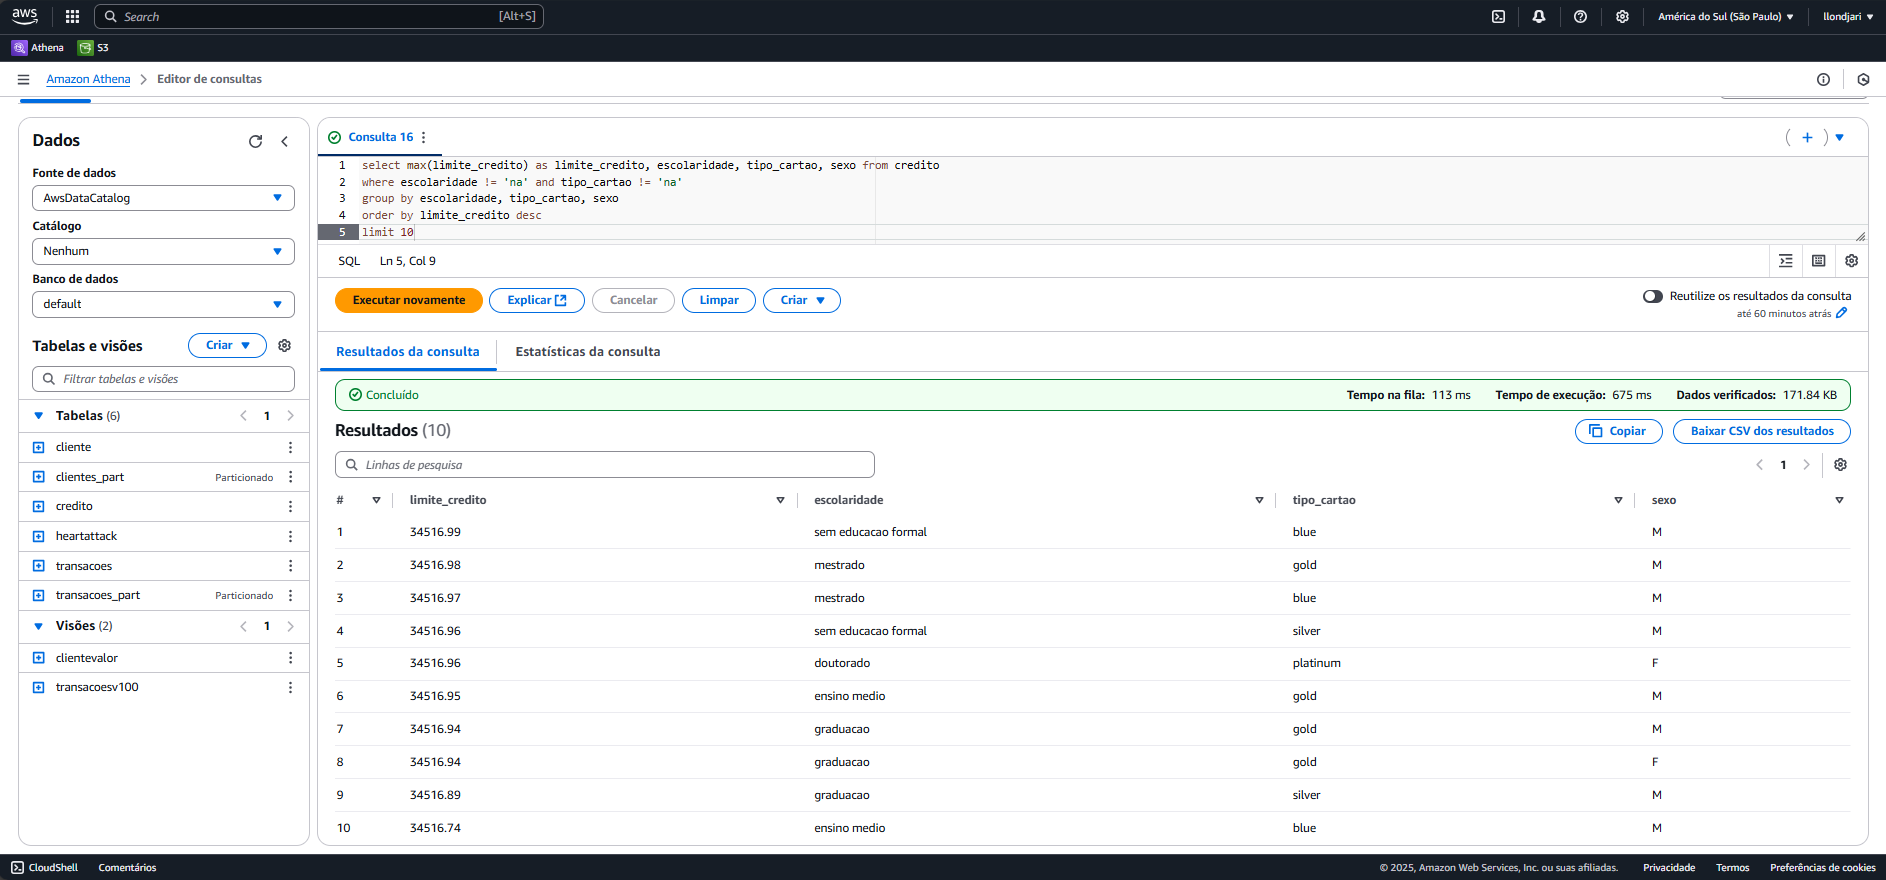

* Calcular o maior valor gasto, a média dos valores gastos e o menor valor gasto nos últimos 12 meses para cada sexo.

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo;
```

Para analisar os gastos dos clientes, divididos por sexo.

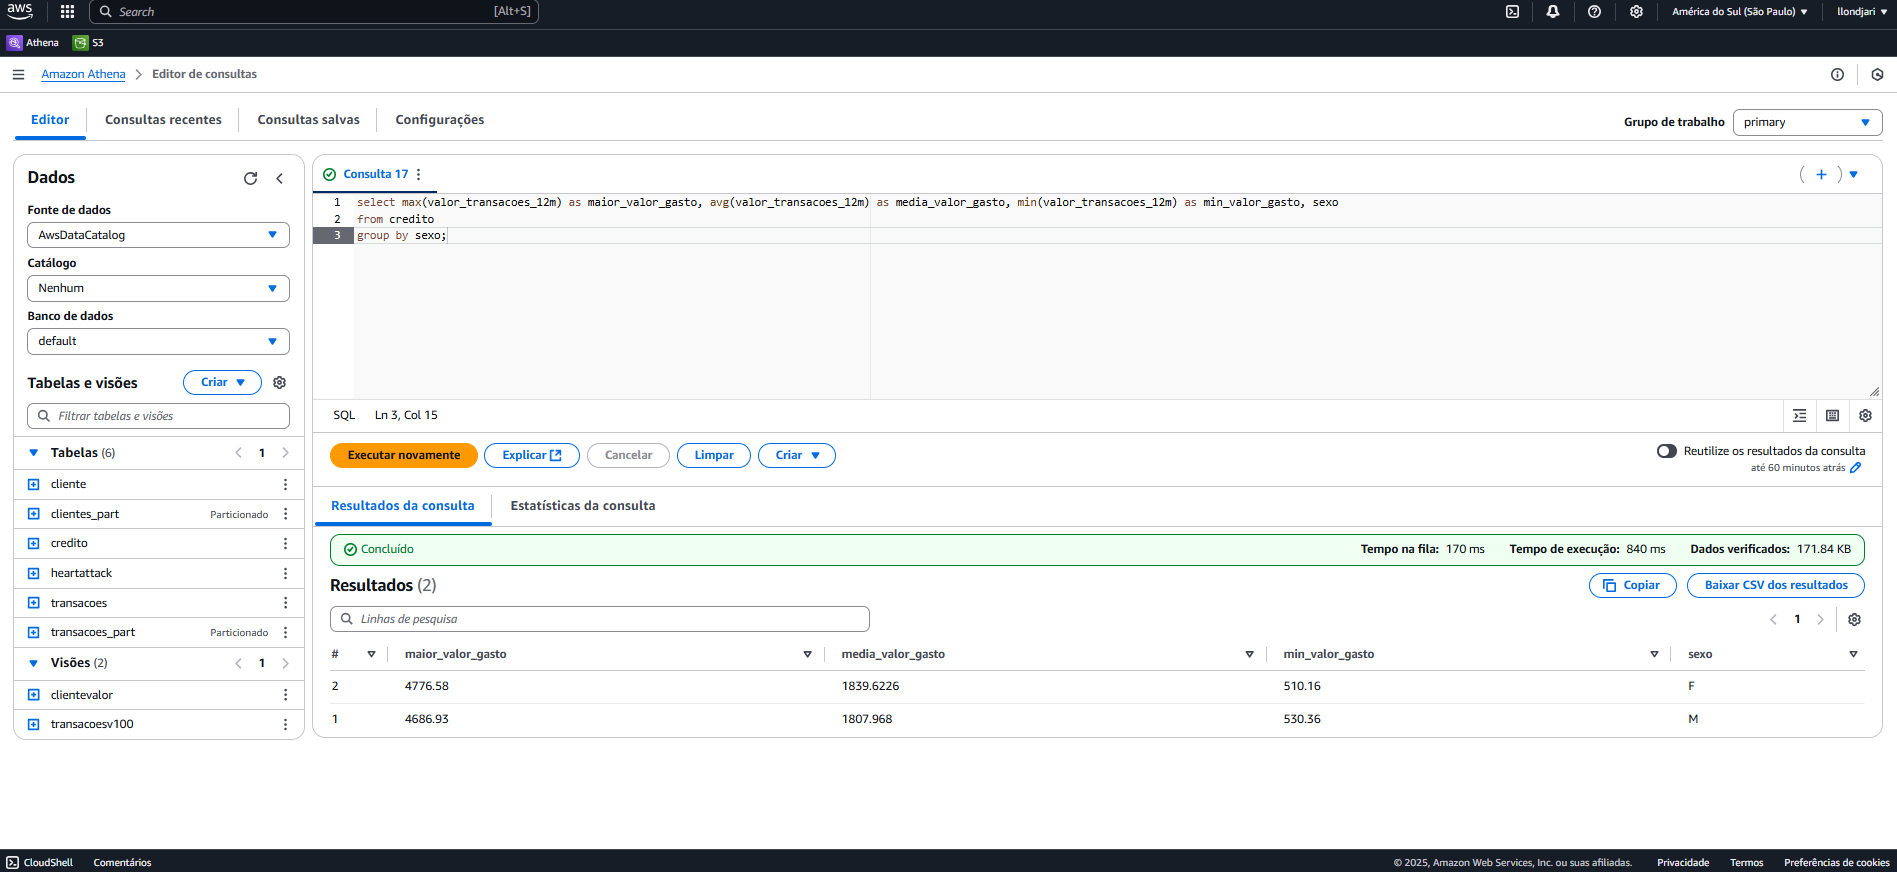

* Analisar o comportamento dos clientes com base em seu sexo e salário anual, considerando a quantidade média de produtos, o valor médio das transações nos últimos 12 meses e o limite médio de crédito:

```sql
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc
```

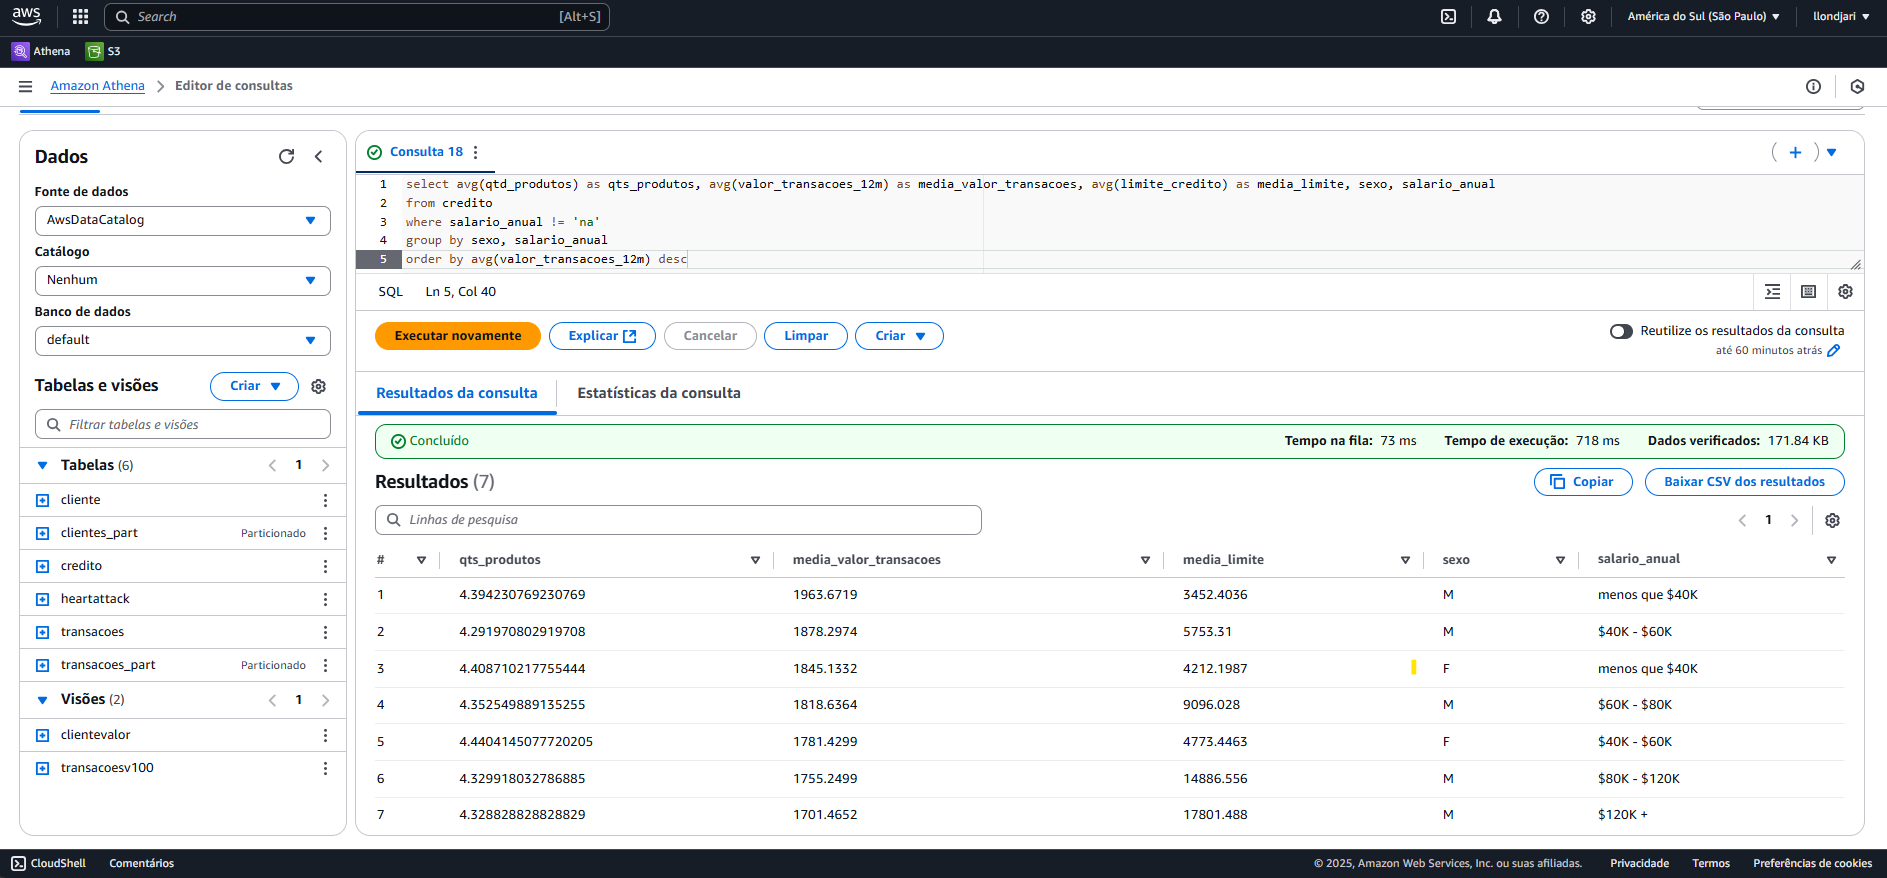

### **3.5.3 Correlação entre Variáveis**

* Contar combinações de valores:

```sql
SELECT estado_civil, tipo_cartao, COUNT(*) FROM credito GROUP BY estado_civil, tipo_cartao;
```
Conta a frequência de diferentes combinações de valores em duas ou mais colunas, identificando possíveis correlações.

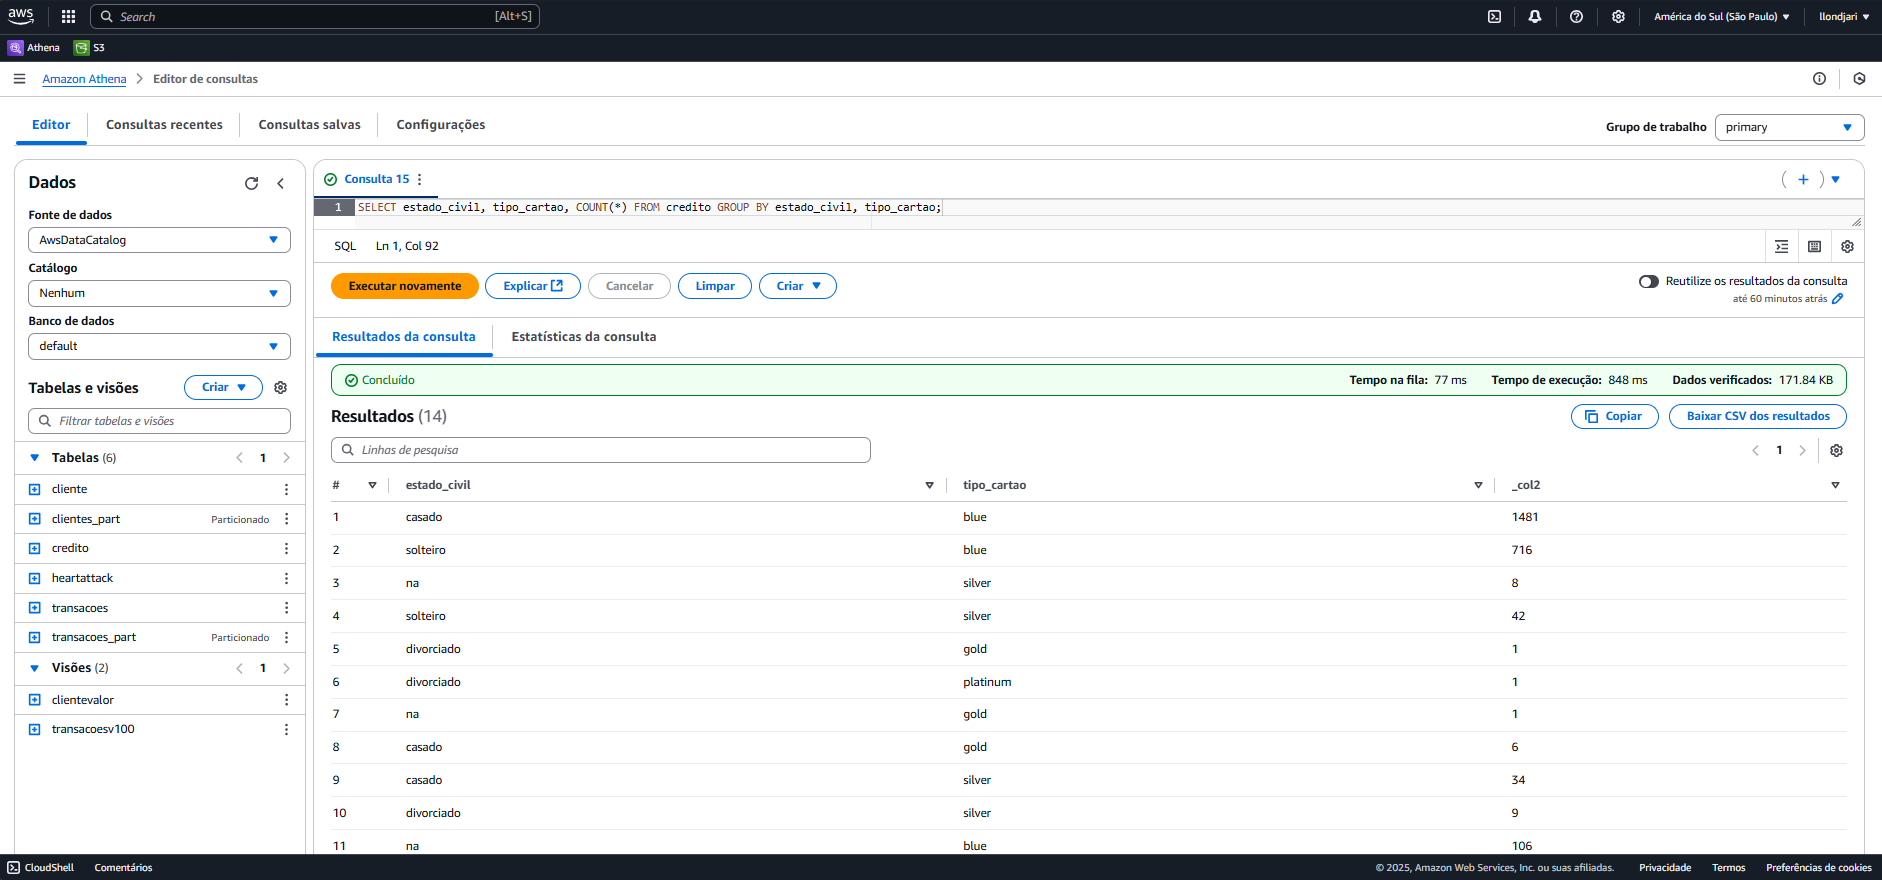

#  **4 - Conclusões**

Alguns insights para abordar nas conclusões:


1.   Possibiliade de trabalhar com quantidade de dado muito grande para trbalhar com excel, mais de 10k linhas;
2.   Comando em sql para verificar valores nulos na tabela maior do que o usado no python. Porém o python usa a memória RAM.
3.   Identificar clientes que que gastam mais é interessantes para pensar em formas de bonifica-los para que continuem gastando mais. De mesmo modo, identificar clientes que gastam menos é interessante para que se possa pensar em estratégias que os façam gastar mais.
4.   
3.   Identificar os clientes com maior tempo de inatividade pode ser crucial para ações de retenção e reativação.
4.   Essas medidas (médias. max e min por coluna) fornecem uma visão geral da distribuição dos valores de transações, ajudando a entender a escala e a variabilidade dos dados.

